# Clustering Analysis for TikTok Social Media Data

This notebook combines data processing and clustering algorithms to analyze TikTok video data.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Data Loading and Preprocessing

In [2]:
# Load data from Google Drive
# Madhav Data
filepath1 = './Dataset #2 cleaned of blank and null values.csv'
filepath2 = './Dataset #3 cleaned of blank and null values.csv'

# Peniel Data
filepath4 = './cleaned_dataset1.csv'
filepath5 = './cleaned_dataset2.csv'

df1_m = pd.read_csv(filepath1)
print("File 1 read successfully!")

df2_m = pd.read_csv(filepath2)
print("File 2 read successfully!")

df4_p = pd.read_csv(filepath4)
print("File 3 read successfully!")

df5_p = pd.read_csv(filepath5)
print("File 4 read successfully!")

File 1 read successfully!
File 2 read successfully!
File 3 read successfully!
File 4 read successfully!


In [3]:
# Check column names for each dataframe
print("df1_m columns:")
print(df1_m.columns.tolist())
print(f"\nShape: {df1_m.shape}")

df1_m columns:
['authorMeta.avatar', 'authorMeta.name', 'text', 'diggCount', 'shareCount', 'playCount', 'commentCount', 'videoMeta.duration', 'musicMeta.musicName', 'musicMeta.musicAuthor', 'musicMeta.musicOriginal', 'createTimeISO', 'webVideoUrl']

Shape: (97, 13)


In [4]:
print("df2_m columns:")
print(df2_m.columns.tolist())
print(f"\nShape: {df2_m.shape}")

df2_m columns:
['authormeta_avatar', 'authormeta_name', 'text', 'diggcount', 'sharecount', 'playcount', 'commentcount', 'videometa_duration', 'musicmeta_musicname', 'musicmeta_musicauthor', 'musicmeta_musicoriginal', 'createtimeiso', 'webvideourl']

Shape: (652, 13)


In [5]:
print("df4_p columns:")
print(df4_p.columns.tolist())
print(f"\nShape: {df4_p.shape}")

df4_p columns:
['authorMeta.avatar', 'authorMeta.name', 'text', 'diggCount', 'shareCount', 'playCount', 'commentCount', 'videoMeta.duration', 'musicMeta.musicName', 'musicMeta.musicAuthor', 'musicMeta.musicOriginal', 'createTimeISO', 'webVideoUrl']

Shape: (48, 13)


In [6]:
print("df5_p columns:")
print(df5_p.columns.tolist())
print(f"\nShape: {df5_p.shape}")

df5_p columns:
['authorMeta.avatar', 'authorMeta.name', 'text', 'diggCount', 'shareCount', 'playCount', 'commentCount', 'videoMeta.duration', 'musicMeta.musicName', 'musicMeta.musicAuthor', 'musicMeta.musicOriginal', 'createTimeISO', 'webVideoUrl']

Shape: (364, 13)


In [7]:
# Standardize column names
df2_m = df2_m.rename(columns={
    'authormeta_avatar': 'authorMeta.avatar',
    'authormeta_name': 'authorMeta.name',
    'diggcount': 'diggCount',
    'sharecount': 'shareCount',
    'playcount': 'playCount',
    'commentcount': 'commentCount',
    'videometa_duration': 'videoMeta.duration',
    'musicmeta_musicname': 'musicMeta.musicName',
    'musicmeta_musicauthor': 'musicMeta.musicAuthor',
    'musicmeta_musicoriginal': 'musicMeta.musicOriginal',
    'createtimeiso': 'createTimeISO',
    'webvideourl': 'webVideoUrl'
})

# Combine all dataframes
combined_df = pd.concat([df1_m, df2_m, df4_p, df5_p], ignore_index=True)
print(f"Combined dataframe shape: {combined_df.shape}")

Combined dataframe shape: (1161, 13)


In [8]:
# Display combined dataframe info
print("=== COMBINED DATAFRAME INFO ===")
combined_df.info()
print(f"\nMissing values per column:")
print(combined_df.isnull().sum())

=== COMBINED DATAFRAME INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta.avatar        1161 non-null   object
 1   authorMeta.name          1161 non-null   object
 2   text                     1130 non-null   object
 3   diggCount                1161 non-null   int64 
 4   shareCount               1161 non-null   int64 
 5   playCount                1161 non-null   int64 
 6   commentCount             1161 non-null   int64 
 7   videoMeta.duration       1161 non-null   int64 
 8   musicMeta.musicName      1153 non-null   object
 9   musicMeta.musicAuthor    1153 non-null   object
 10  musicMeta.musicOriginal  1161 non-null   bool  
 11  createTimeISO            1161 non-null   object
 12  webVideoUrl              509 non-null    object
dtypes: bool(1), int64(5), object(7)
memory usage: 110.1+ KB

Miss

In [9]:
# Check for duplicates
print(f"Number of duplicate rows: {combined_df.duplicated().sum()}")
print(f"Total rows before cleaning: {len(combined_df)}")

Number of duplicate rows: 0
Total rows before cleaning: 1161


In [10]:
# Drop webVideoUrl column if it exists
if 'webVideoUrl' in combined_df.columns:
    combined_df = combined_df.drop(['webVideoUrl'], axis=1)
    print("Dropped 'webVideoUrl' column")
else:
    print("'webVideoUrl' column not found")

Dropped 'webVideoUrl' column


In [11]:
# Remove duplicates and missing values
combined_df = combined_df.drop_duplicates()
print(f"Rows after removing duplicates: {len(combined_df)}")

final_df = combined_df.dropna()
print(f"Rows after removing missing values: {len(final_df)}")
print(f"Final dataframe shape: {final_df.shape}")

Rows after removing duplicates: 1161
Rows after removing missing values: 1122
Final dataframe shape: (1122, 12)


=== NUMERICAL FEATURES CORRELATION MATRIX ===
                         diggCount  shareCount  playCount  commentCount  \
diggCount                 1.000000    0.573092   0.801204      0.201612   
shareCount                0.573092    1.000000   0.542935      0.142283   
playCount                 0.801204    0.542935   1.000000      0.239892   
commentCount              0.201612    0.142283   0.239892      1.000000   
videoMeta.duration       -0.033174   -0.026829  -0.030401     -0.012647   
musicMeta.musicOriginal  -0.040743    0.058905  -0.005395      0.012773   

                         videoMeta.duration  musicMeta.musicOriginal  
diggCount                         -0.033174                -0.040743  
shareCount                        -0.026829                 0.058905  
playCount                         -0.030401                -0.005395  
commentCount                      -0.012647                 0.012773  
videoMeta.duration                 1.000000                 0.037318  
mu

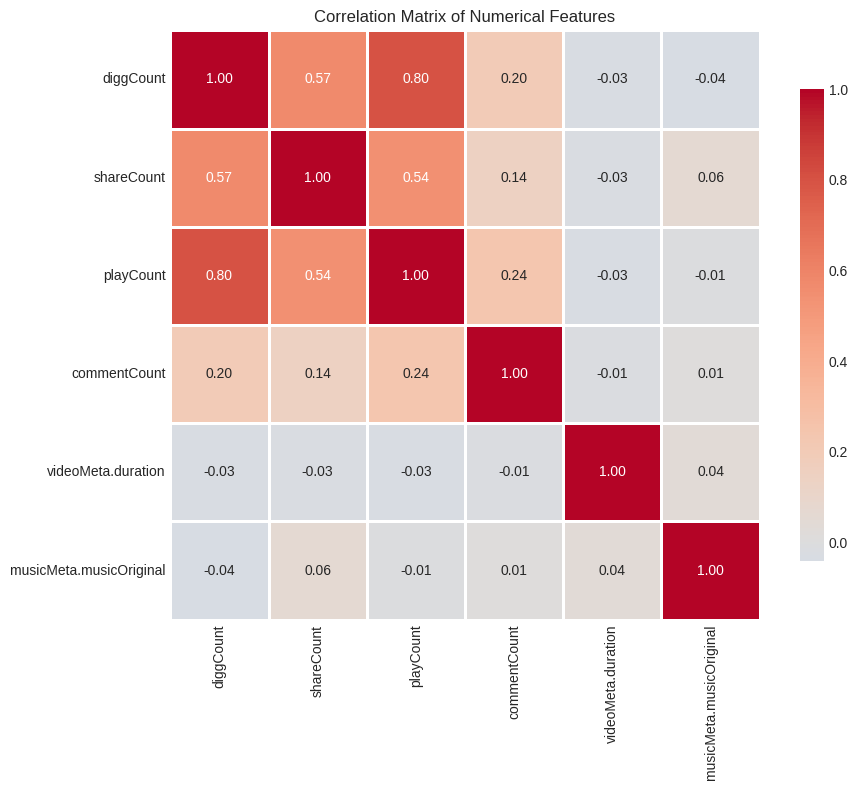

In [12]:
# Extract numerical features for clustering
final_df_num = final_df.drop(['authorMeta.avatar', 'authorMeta.name', 'text',
                               'musicMeta.musicName', 'musicMeta.musicAuthor', 'createTimeISO'], axis=1)

# Convert boolean to int for correlation
if 'musicMeta.musicOriginal' in final_df_num.columns:
    final_df_num['musicMeta.musicOriginal'] = final_df_num['musicMeta.musicOriginal'].astype(int)

print("=== NUMERICAL FEATURES CORRELATION MATRIX ===")
correlation_matrix = final_df_num.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## 2. Exploratory Data Analysis

In [13]:
# Display final dataframe summary
print("=== FINAL DATAFRAME SUMMARY ===")
print(f"\nTotal rows: {len(final_df)}")
print(f"Total columns: {len(final_df.columns)}")
print(f"\nColumn names:")
print(final_df.columns.tolist())
print(f"\nDataframe shape: {final_df.shape}")
print(f"\nFirst few rows:")
display(final_df.head())

print(f"\n\n=== NUMERICAL FEATURES SUMMARY ===")
print(final_df_num.describe())

=== FINAL DATAFRAME SUMMARY ===

Total rows: 1122
Total columns: 12

Column names:
['authorMeta.avatar', 'authorMeta.name', 'text', 'diggCount', 'shareCount', 'playCount', 'commentCount', 'videoMeta.duration', 'musicMeta.musicName', 'musicMeta.musicAuthor', 'musicMeta.musicOriginal', 'createTimeISO']

Dataframe shape: (1122, 12)

First few rows:


,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,musicMeta.musicOriginal,createTimeISO
0,https://p16-common-sign.tiktokcdn-us.com/tos-u...,realunfilteredmom,TikTok’s New Algorithm favors WATCH TIME! #new...,36,3,275,12,102,original sound,ShopTokHolly,True,2025-09-19T23:27:12.000Z
1,https://p16-common-sign.tiktokcdn-us.com/tos-u...,_leftmyshoes,watch all videos all the way through!! #creato...,15,2,172,3,56,original sound,amycateee,True,2025-07-18T16:52:58.000Z
2,https://p16-common-sign.tiktokcdn-us.com/tos-u...,pirouettesuzette,#SEO #quality #engagement #trends #viral #how,120,24,865,81,71,Enjoy the Moment,Zeca Zilocchi,False,2025-07-17T01:51:34.000Z
3,https://p16-common-sign.tiktokcdn-us.com/tos-m...,lennix4311,Did you know that when you you type in the com...,87,6,17400,243,15,"Spooky, quiet, scary atmosphere piano songs",Skittlegirl Sound,False,2025-01-10T15:48:54.000Z
4,https://p16-common-sign.tiktokcdn-us.com/tos-u...,contentbytan,It's a key metric for measuring audience engag...,89,17,461,73,11,original sound,Sweet T | SAHM,True,2025-08-24T04:01:05.000Z




=== NUMERICAL FEATURES SUMMARY ===
          diggCount    shareCount     playCount  commentCount  \
count  1.122000e+03  1.122000e+03  1.122000e+03  1.122000e+03   
mean   5.057199e+05  4.045547e+04  6.473062e+06  9.168389e+03   
std    1.521648e+06  1.792353e+05  2.229705e+07  6.871059e+04   
min    0.000000e+00  0.000000e+00  6.200000e+01  0.000000e+00   
25%    1.327250e+03  7.225000e+01  5.372500e+04  4.900000e+01   
50%    3.155000e+04  1.636500e+03  6.337500e+05  3.880000e+02   
75%    3.312000e+05  1.430000e+04  4.300000e+06  2.924250e+03   
max    2.500000e+07  2.900000e+06  4.060000e+08  1.800000e+06   

       videoMeta.duration  musicMeta.musicOriginal  
count         1122.000000              1122.000000  
mean            39.424242                 0.742424  
std            158.376915                 0.437494  
min              4.000000                 0.000000  
25%             10.000000                 0.000000  
50%             17.000000                 1.000000  
75%   

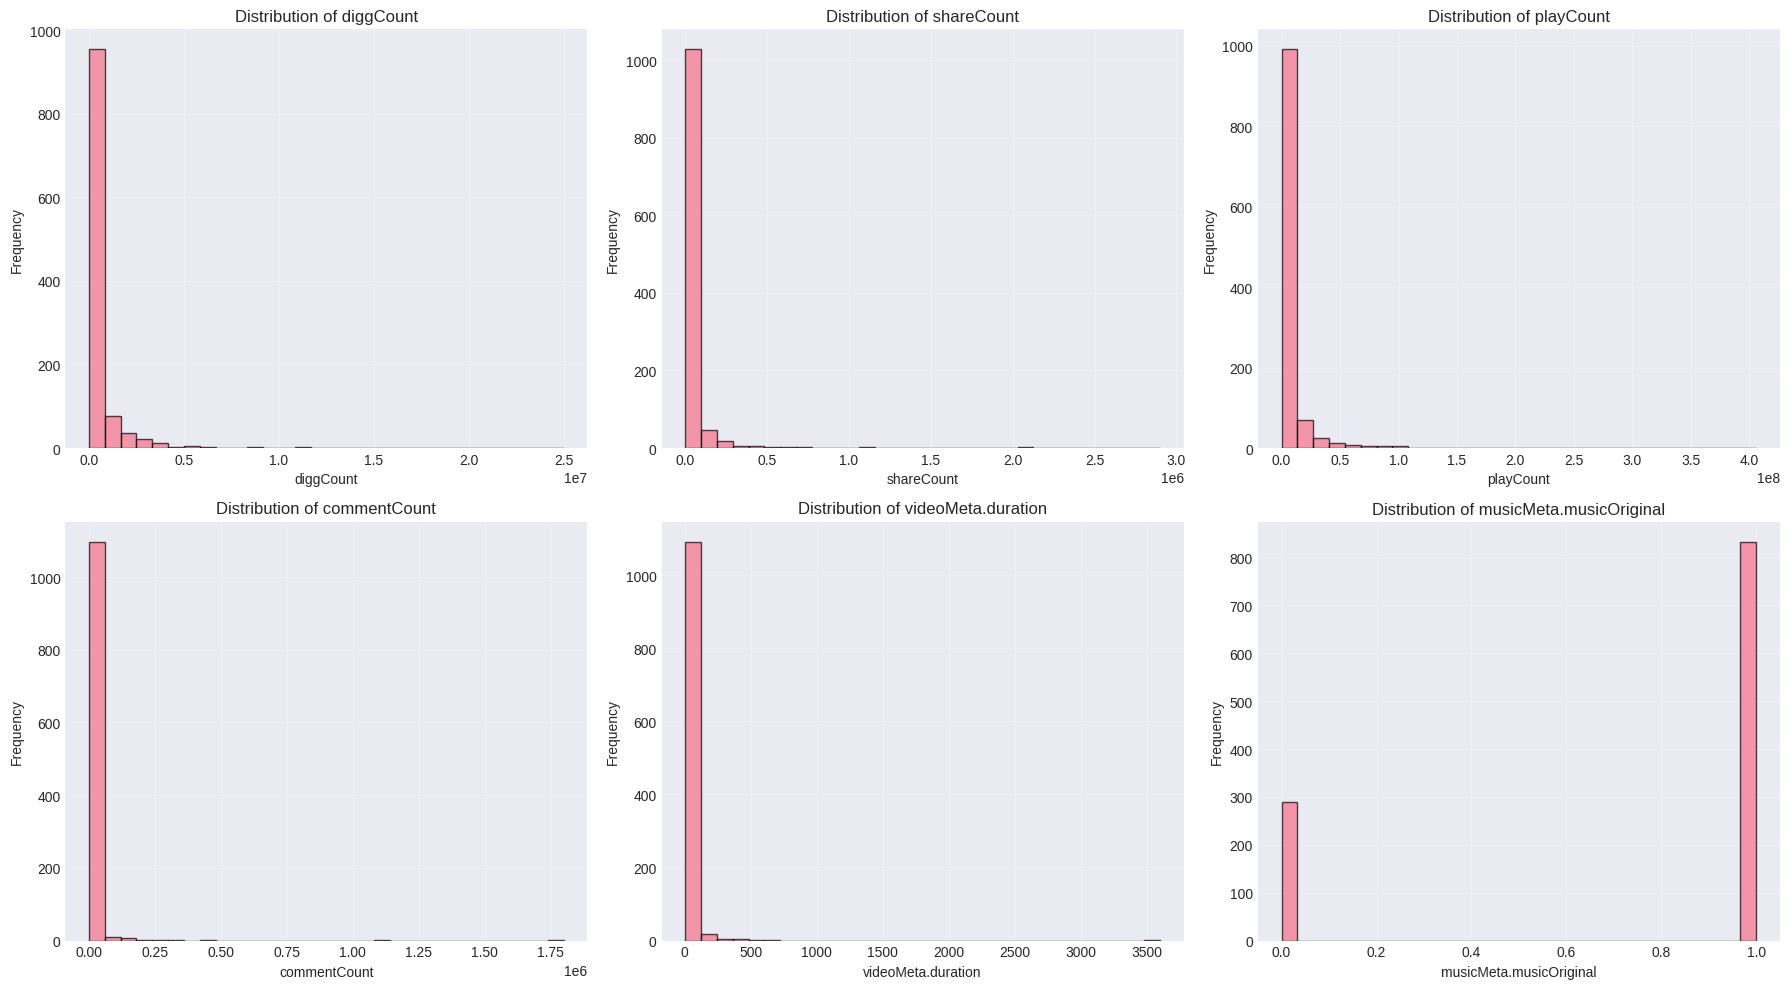

In [14]:
# Visualize distributions of numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

numerical_cols = final_df_num.columns.tolist()
for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(final_df_num[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Data Preprocessing for Clustering


In [15]:
# Prepare data for clustering
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_num)

print(f"Original shape: {final_df_num.shape}")
print(f"Scaled shape: {X_scaled.shape}")
print(f"\nScaled data statistics:")
print(f"Mean: {X_scaled.mean(axis=0).round(4)}")
print(f"Std: {X_scaled.std(axis=0).round(4)}")


Original shape: (1122, 6)
Scaled shape: (1122, 6)

Scaled data statistics:
Mean: [ 0.  0. -0.  0.  0.  0.]
Std: [1. 1. 1. 1. 1. 1.]


## 4. Dimensionality Reduction


In [16]:
print("=" * 70)
print("DIMENSIONALITY REDUCTION TECHNIQUES")
print("=" * 70)

# ============================================================================
# PCA (Principal Component Analysis)
# ============================================================================
print("\n1. PCA (Principal Component Analysis)")
print("-" * 50)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# PCA with more components for variance analysis
pca_full = PCA()
pca_full.fit(X_scaled)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components_95}")


DIMENSIONALITY REDUCTION TECHNIQUES

1. PCA (Principal Component Analysis)
--------------------------------------------------
Original shape: (1122, 6)
Reduced shape: (1122, 2)
Explained variance ratio: [0.39540221 0.17364116]
Total variance explained: 0.5690
Number of components for 95% variance: 5


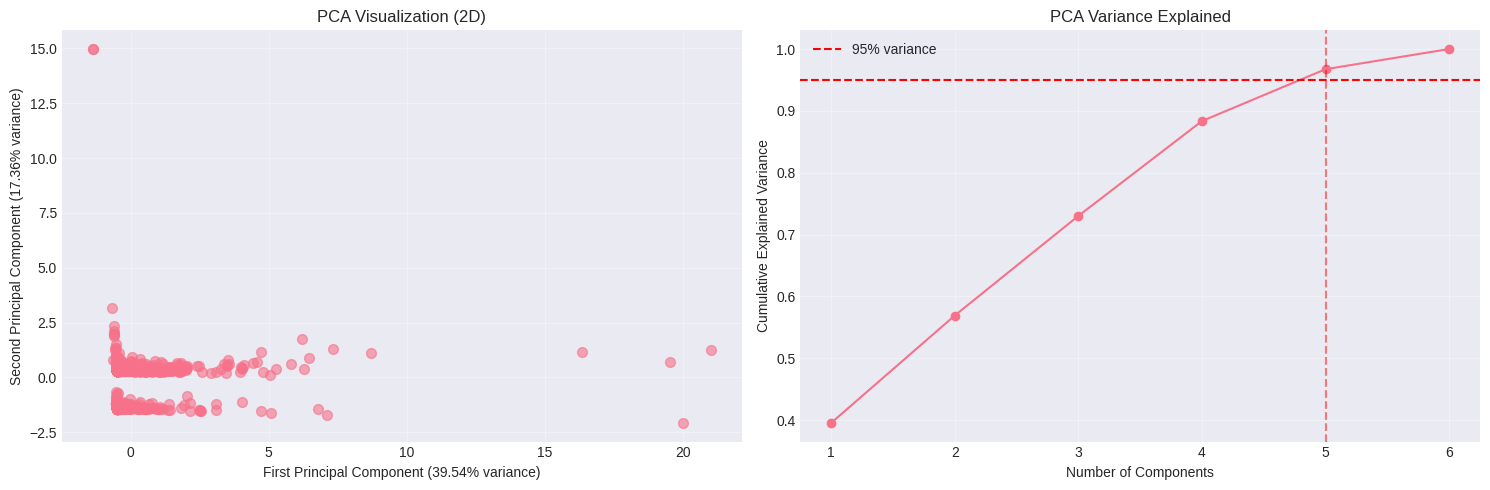

In [17]:
# Visualize PCA results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# PCA 2D visualization
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50)
axes[0].set_title('PCA Visualization (2D)')
axes[0].set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].grid(True, alpha=0.3)

# Cumulative variance explained
axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, marker='o')
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% variance')
axes[1].axvline(x=n_components_95, color='r', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('PCA Variance Explained')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()



2. t-SNE (t-Distributed Stochastic Neighbor Embedding)
--------------------------------------------------
Dataset is large (1122 samples). Using sample for t-SNE...
t-SNE applied to 1000 samples
Original shape: (1122, 6)
Reduced shape: (1000, 2)
KL divergence: 0.3918


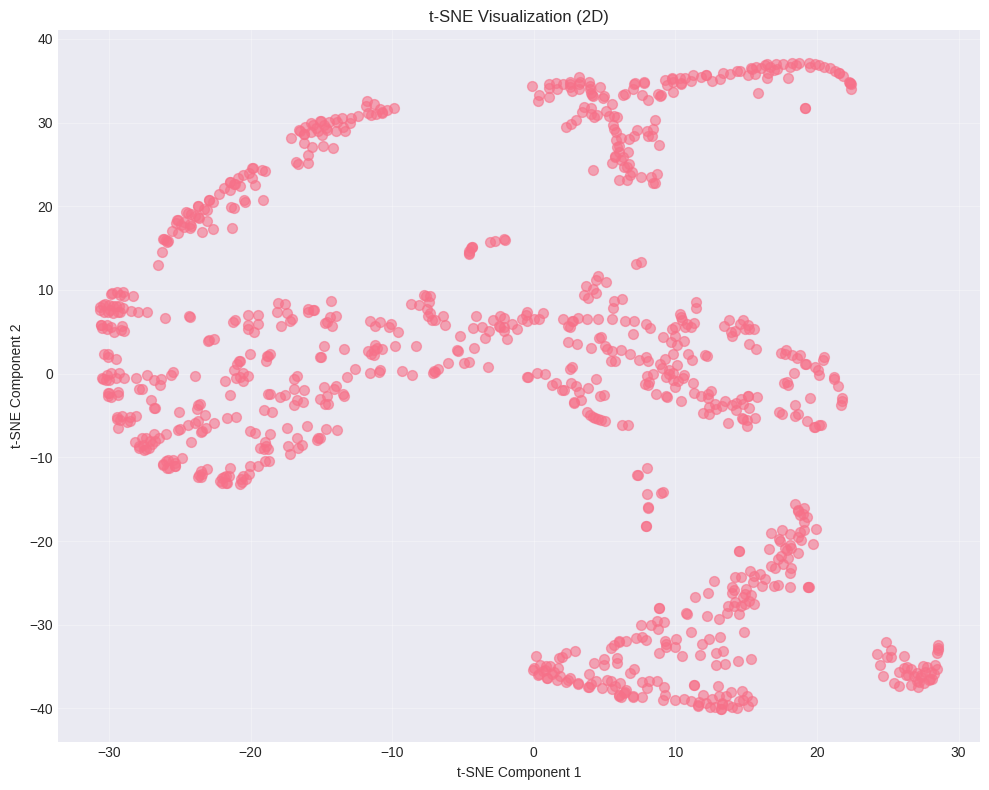

In [18]:
# ============================================================================
# t-SNE (t-Distributed Stochastic Neighbor Embedding)
# ============================================================================
print("\n2. t-SNE (t-Distributed Stochastic Neighbor Embedding)")
print("-" * 50)

# Note: t-SNE can be slow for large datasets, so we might use a sample
if len(X_scaled) > 1000:
    print(f"Dataset is large ({len(X_scaled)} samples). Using sample for t-SNE...")
    sample_indices = np.random.choice(len(X_scaled), size=1000, replace=False)
    X_tsne_sample = X_scaled[sample_indices]
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    X_tsne = tsne.fit_transform(X_tsne_sample)
    print(f"t-SNE applied to {len(X_tsne_sample)} samples")
else:
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)
    sample_indices = np.arange(len(X_scaled))

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_tsne.shape}")
print(f"KL divergence: {tsne.kl_divergence_:.4f}")

# Visualize t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, s=50)
plt.title('t-SNE Visualization (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Clustering Algorithms


In [19]:
print("=" * 70)
print("CLUSTERING ALGORITHMS")
print("=" * 70)

# Use PCA-reduced data for clustering (2D for visualization)
X_for_clustering = X_pca

# Determine optimal number of clusters using elbow method
print("\nDetermining optimal number of clusters...")
inertias = []
silhouettes = []
K_range = range(2, min(11, len(X_for_clustering) // 10 + 1))  # Limit K based on data size

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_for_clustering)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_for_clustering, km.labels_))

# Find optimal K (elbow point)
optimal_k = K_range[np.argmax(silhouettes)]
print(f"Optimal number of clusters (based on silhouette score): {optimal_k}")


CLUSTERING ALGORITHMS

Determining optimal number of clusters...
Optimal number of clusters (based on silhouette score): 2


In [20]:
# ============================================================================
# 1. K-Means Clustering
# ============================================================================
print("\n1. K-Means Clustering")
print("-" * 50)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_for_clustering)

print(f"Number of clusters: {len(set(kmeans_labels))}")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering, kmeans_labels):.4f}")
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")



1. K-Means Clustering
--------------------------------------------------
Number of clusters: 2
Inertia: 2339.15
Silhouette Score: 0.8169
Cluster centers shape: (2, 2)


In [21]:
# ============================================================================
# 2. DBSCAN (Density-Based Spatial Clustering)
# ============================================================================
print("\n2. DBSCAN (Density-Based Spatial Clustering)")
print("-" * 50)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_for_clustering)

n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters_db}")
print(f"Number of noise points: {n_noise}")
if n_clusters_db > 1:
    mask = dbscan_labels != -1
    if mask.sum() > 1:  # Need at least 2 points for silhouette score
        print(f"Silhouette Score: {silhouette_score(X_for_clustering[mask], dbscan_labels[mask]):.4f}")
    else:
        print("Not enough non-noise points for silhouette score")
else:
    print("DBSCAN found no clusters or only noise")



2. DBSCAN (Density-Based Spatial Clustering)
--------------------------------------------------
Number of clusters: 3
Number of noise points: 24
Silhouette Score: 0.7210


In [22]:
# ============================================================================
# 3. Hierarchical Clustering (Agglomerative)
# ============================================================================
print("\n3. Hierarchical Clustering (Agglomerative)")
print("-" * 50)

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_for_clustering)

print(f"Number of clusters: {len(set(hierarchical_labels))}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering, hierarchical_labels):.4f}")



3. Hierarchical Clustering (Agglomerative)
--------------------------------------------------
Number of clusters: 2
Silhouette Score: 0.8125


In [23]:
# ============================================================================
# 4. Gaussian Mixture Model (GMM)
# ============================================================================
print("\n4. Gaussian Mixture Model (GMM)")
print("-" * 50)

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_for_clustering)
gmm_probs = gmm.predict_proba(X_for_clustering)

print(f"Number of components: {gmm.n_components}")
print(f"Converged: {gmm.converged_}")
print(f"BIC: {gmm.bic(X_for_clustering):.2f}")
print(f"AIC: {gmm.aic(X_for_clustering):.2f}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering, gmm_labels):.4f}")



4. Gaussian Mixture Model (GMM)
--------------------------------------------------
Number of components: 2
Converged: True
BIC: 3620.99
AIC: 3565.74
Silhouette Score: 0.3189


In [24]:
# ============================================================================
# 5. Mean Shift
# ============================================================================
print("\n5. Mean Shift")
print("-" * 50)

meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(X_for_clustering)

print(f"Number of clusters: {len(set(meanshift_labels))}")
print(f"Cluster centers: {meanshift.cluster_centers_.shape}")
if len(set(meanshift_labels)) > 1:
    print(f"Silhouette Score: {silhouette_score(X_for_clustering, meanshift_labels):.4f}")
else:
    print("Only one cluster found - cannot compute silhouette score")



5. Mean Shift
--------------------------------------------------
Number of clusters: 14
Cluster centers: (14, 2)
Silhouette Score: 0.7259


In [25]:
# ============================================================================
# 6. Spectral Clustering
# ============================================================================
print("\n6. Spectral Clustering")
print("-" * 50)

spectral = SpectralClustering(n_clusters=optimal_k, random_state=42, affinity='rbf')
spectral_labels = spectral.fit_predict(X_for_clustering)

print(f"Number of clusters: {len(set(spectral_labels))}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering, spectral_labels):.4f}")



6. Spectral Clustering
--------------------------------------------------
Number of clusters: 2
Silhouette Score: 0.9276


## 6. Clustering Results Visualization


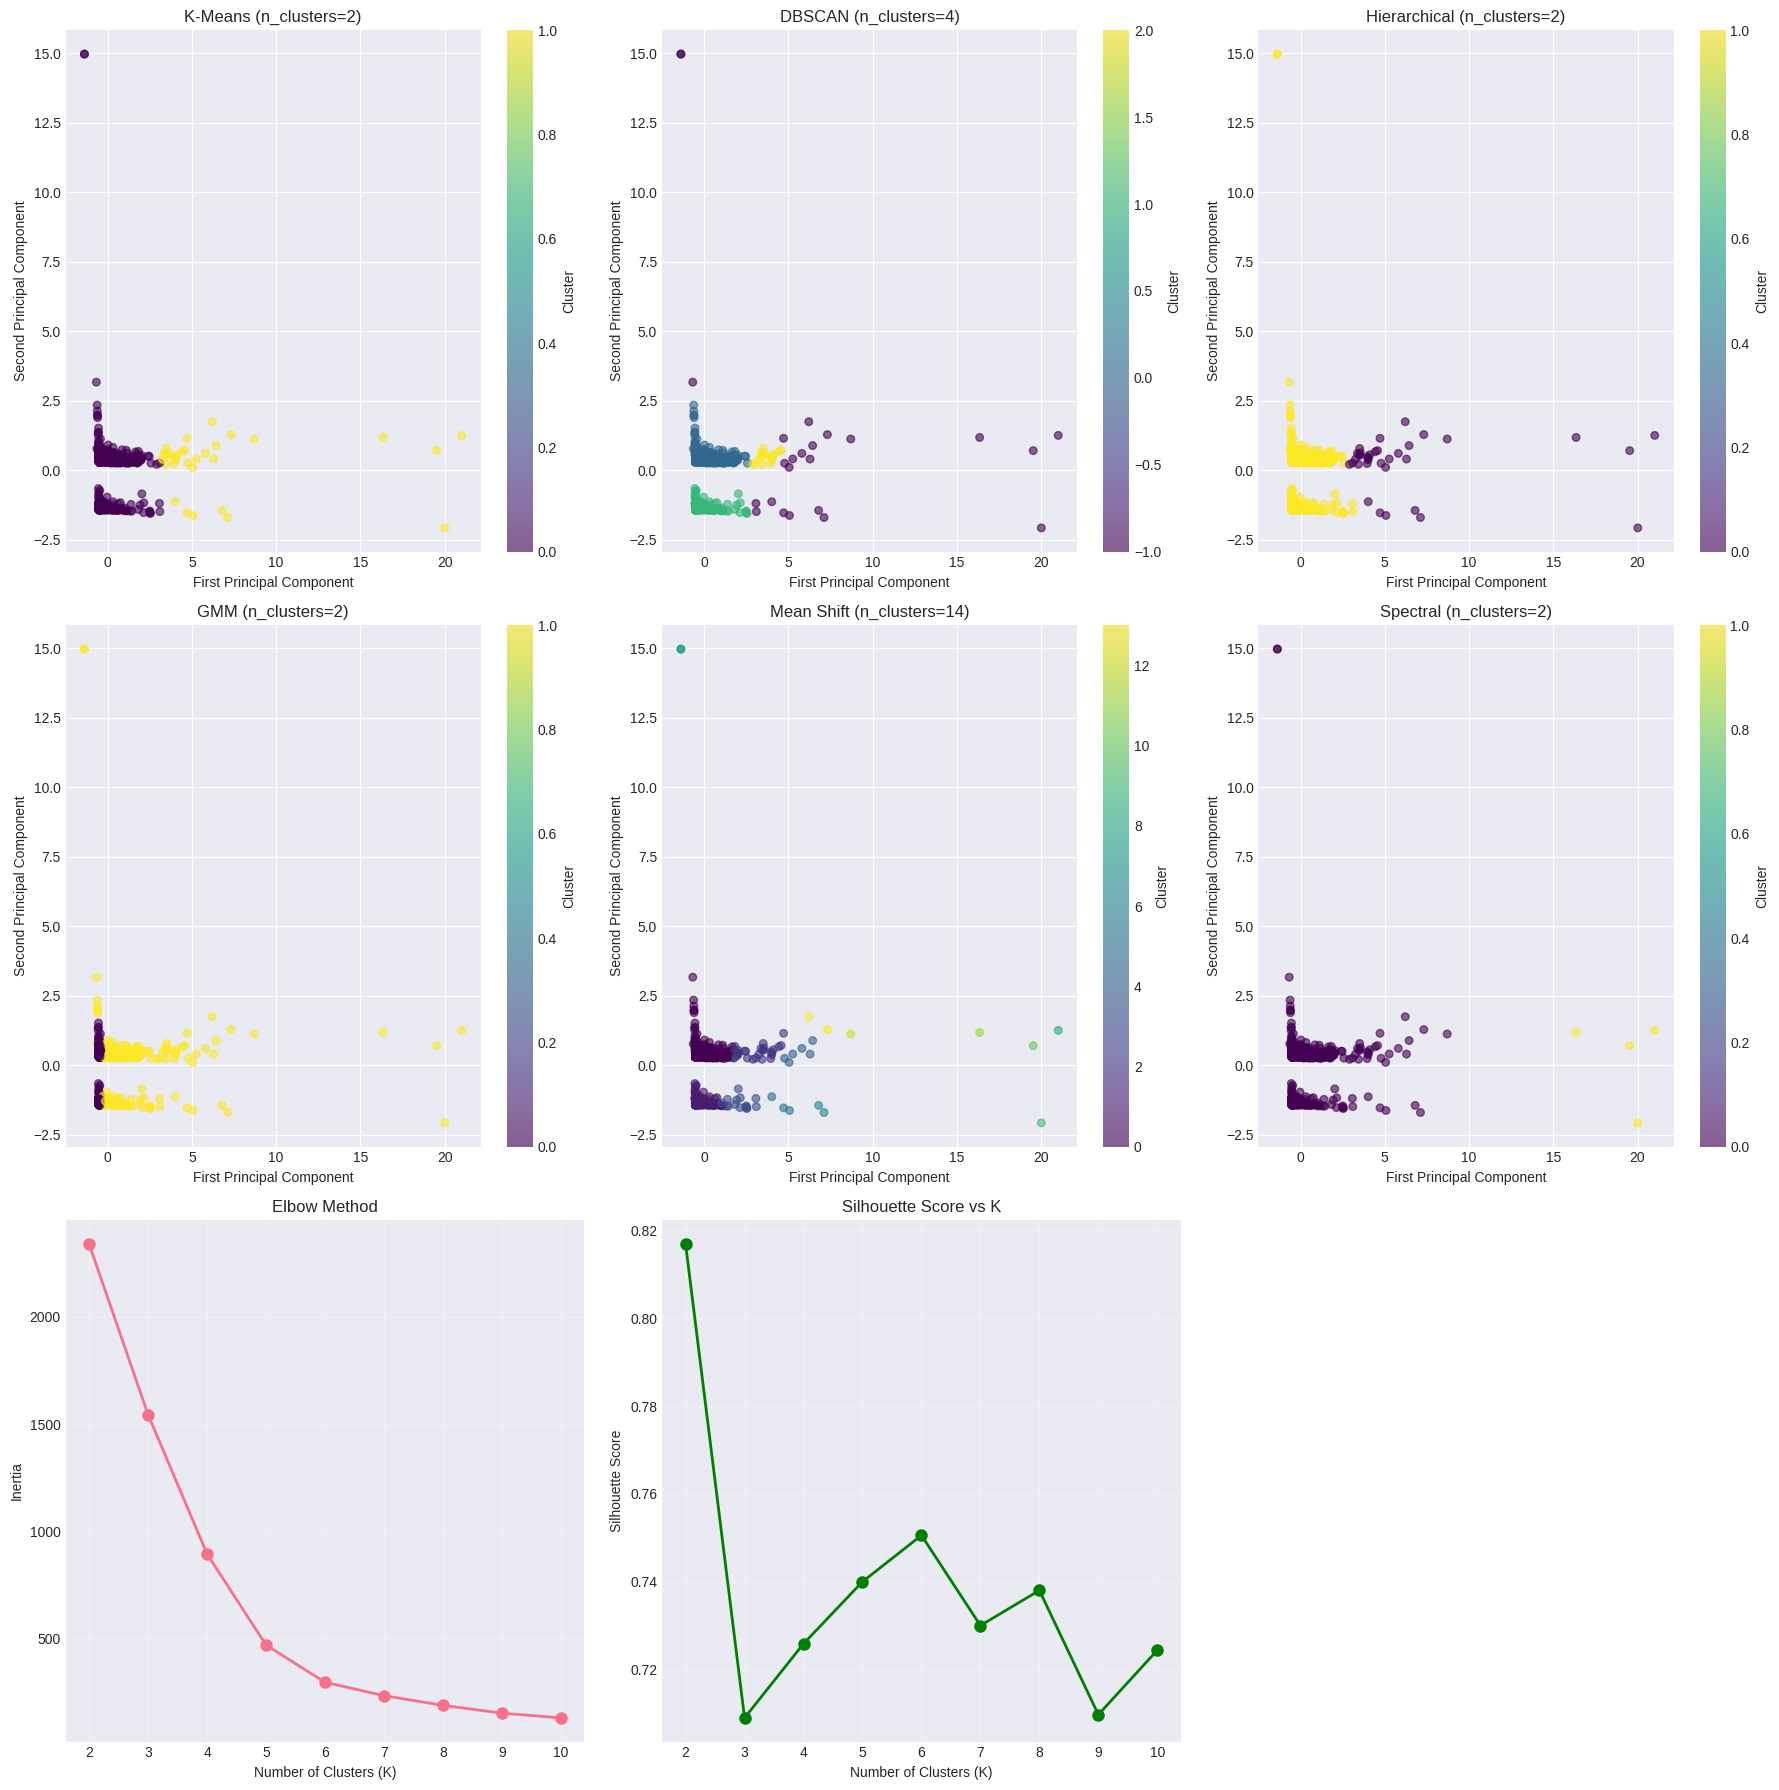

In [26]:
# Visualize all clustering results
algorithms = [
    ('K-Means', kmeans_labels),
    ('DBSCAN', dbscan_labels),
    ('Hierarchical', hierarchical_labels),
    ('GMM', gmm_labels),
    ('Mean Shift', meanshift_labels),
    ('Spectral', spectral_labels)
]

# Create visualization
n_algorithms = len(algorithms)
n_cols = 3
n_rows = (n_algorithms + 2 + n_cols - 1) // n_cols  # +2 for elbow and silhouette plots

plt.figure(figsize=(18, 6 * n_rows))

for idx, (name, labels) in enumerate(algorithms, 1):
    plt.subplot(n_rows, n_cols, idx)
    scatter = plt.scatter(X_for_clustering[:, 0], X_for_clustering[:, 1],
                         c=labels, cmap='viridis', alpha=0.6, s=30)
    plt.title(f'{name} (n_clusters={len(set(labels))})')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')

# Elbow and Silhouette plots
plt.subplot(n_rows, n_cols, n_algorithms + 1)
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True, alpha=0.3)

plt.subplot(n_rows, n_cols, n_algorithms + 2)
plt.plot(K_range, silhouettes, marker='o', color='green', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Clustering Metrics Comparison


In [27]:
print("=" * 70)
print("CLUSTERING METRICS COMPARISON")
print("=" * 70)

metrics_data = []
for name, labels in algorithms:
    try:
        if name == 'DBSCAN' and -1 in labels:
            mask = labels != -1
            if mask.sum() > 1:  # Need at least 2 points
                sil = silhouette_score(X_for_clustering[mask], labels[mask])
            else:
                sil = np.nan
        else:
            if len(set(labels)) > 1:  # Need at least 2 clusters
                sil = silhouette_score(X_for_clustering, labels)
            else:
                sil = np.nan

        # Davies-Bouldin and Calinski-Harabasz scores
        if len(set(labels)) > 1:
            db = davies_bouldin_score(X_for_clustering, labels)
            ch = calinski_harabasz_score(X_for_clustering, labels)
        else:
            db = np.nan
            ch = np.nan

        metrics_data.append((name, sil, db, ch))
    except Exception as e:
        print(f"Error computing metrics for {name}: {e}")
        metrics_data.append((name, np.nan, np.nan, np.nan))

print(f"\n{'Algorithm':<15} {'Silhouette':<12} {'Davies-Bouldin':<18} {'Calinski-Harabasz'}")
print("-" * 70)
for name, sil, db, ch in metrics_data:
    sil_str = f"{sil:.4f}" if not np.isnan(sil) else "N/A"
    db_str = f"{db:.4f}" if not np.isnan(db) else "N/A"
    ch_str = f"{ch:.2f}" if not np.isnan(ch) else "N/A"
    print(f"{name:<15} {sil_str:<12} {db_str:<18} {ch_str}")

print("\nNote:")
print("- Silhouette Score: Higher is better (range: -1 to 1)")
print("- Davies-Bouldin Index: Lower is better")
print("- Calinski-Harabasz Index: Higher is better")


CLUSTERING METRICS COMPARISON

Algorithm       Silhouette   Davies-Bouldin     Calinski-Harabasz
----------------------------------------------------------------------
K-Means         0.8169       0.6414             714.21
DBSCAN          0.7210       1.2569             466.64
Hierarchical    0.8125       0.6449             710.95
GMM             0.3189       1.6375             160.90
Mean Shift      0.7259       0.4268             1138.85
Spectral        0.9276       0.1562             708.73

Note:
- Silhouette Score: Higher is better (range: -1 to 1)
- Davies-Bouldin Index: Lower is better
- Calinski-Harabasz Index: Higher is better


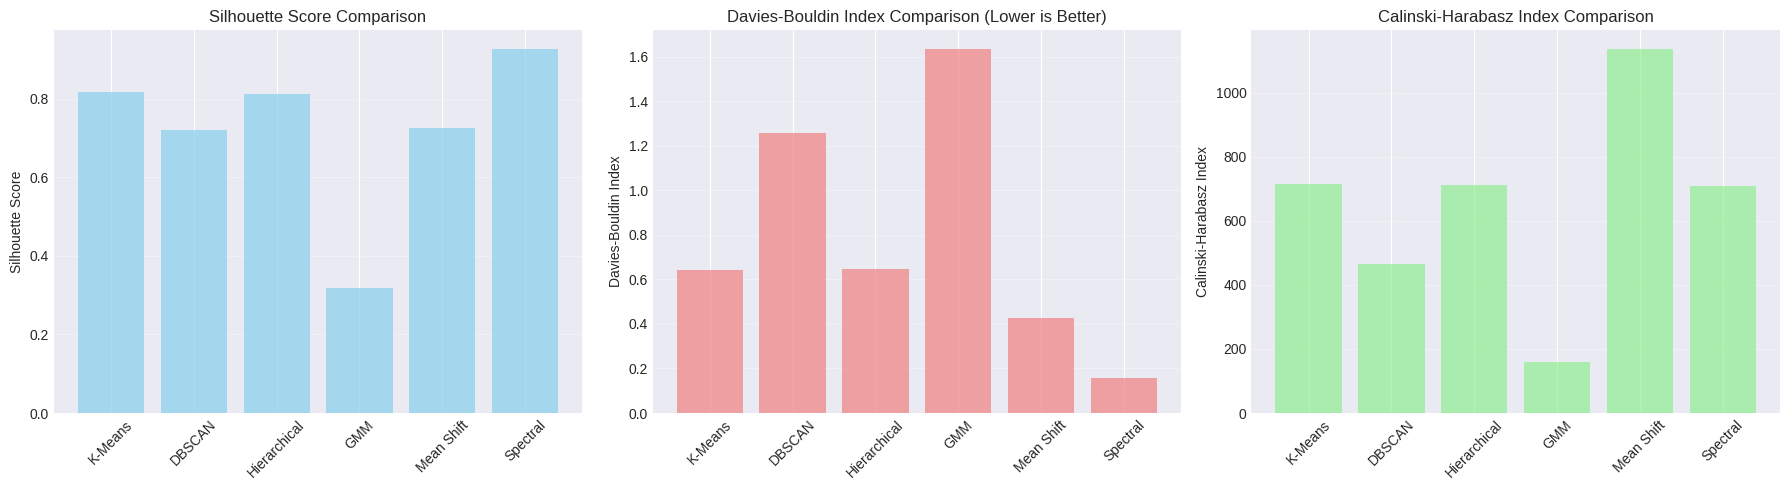

In [28]:
# Visualize metrics comparison
metrics_df = pd.DataFrame(metrics_data, columns=['Algorithm', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(metrics_df['Algorithm'], metrics_df['Silhouette'], color='skyblue', alpha=0.7)
axes[0].set_title('Silhouette Score Comparison')
axes[0].set_ylabel('Silhouette Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Davies-Bouldin Index
axes[1].bar(metrics_df['Algorithm'], metrics_df['Davies-Bouldin'], color='lightcoral', alpha=0.7)
axes[1].set_title('Davies-Bouldin Index Comparison (Lower is Better)')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# Calinski-Harabasz Index
axes[2].bar(metrics_df['Algorithm'], metrics_df['Calinski-Harabasz'], color='lightgreen', alpha=0.7)
axes[2].set_title('Calinski-Harabasz Index Comparison')
axes[2].set_ylabel('Calinski-Harabasz Index')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 8. Cluster Analysis on Original Data


In [29]:
# Add cluster labels to original dataframe
final_df_with_clusters = final_df.copy()
final_df_with_clusters['KMeans_Cluster'] = kmeans_labels
final_df_with_clusters['DBSCAN_Cluster'] = dbscan_labels
final_df_with_clusters['Hierarchical_Cluster'] = hierarchical_labels
final_df_with_clusters['GMM_Cluster'] = gmm_labels
final_df_with_clusters['MeanShift_Cluster'] = meanshift_labels
final_df_with_clusters['Spectral_Cluster'] = spectral_labels

# Analyze clusters using K-Means (as example)
print("=== K-MEANS CLUSTER ANALYSIS ===")
print(f"\nCluster distribution:")
print(final_df_with_clusters['KMeans_Cluster'].value_counts().sort_index())

print(f"\n\n=== CLUSTER STATISTICS (K-Means) ===")
cluster_stats = final_df_with_clusters.groupby('KMeans_Cluster')[final_df_num.columns].agg(['mean', 'std'])
print(cluster_stats)


=== K-MEANS CLUSTER ANALYSIS ===

Cluster distribution:
KMeans_Cluster
0    1089
1      33
Name: count, dtype: int64


=== CLUSTER STATISTICS (K-Means) ===
                   diggCount                   shareCount                 \
                        mean           std           mean            std   
KMeans_Cluster                                                             
0               3.297055e+05  7.093163e+05   20535.206612   58548.374443   
1               6.314197e+06  5.306439e+06  697824.242424  741416.085116   

                   playCount                 commentCount                 \
                        mean           std           mean            std   
KMeans_Cluster                                                             
0               4.180602e+06  9.336678e+06    4525.817264   19188.475840   
1               8.212424e+07  9.149531e+07  162373.242424  357673.268694   

               videoMeta.duration             musicMeta.musicOriginal  \
         

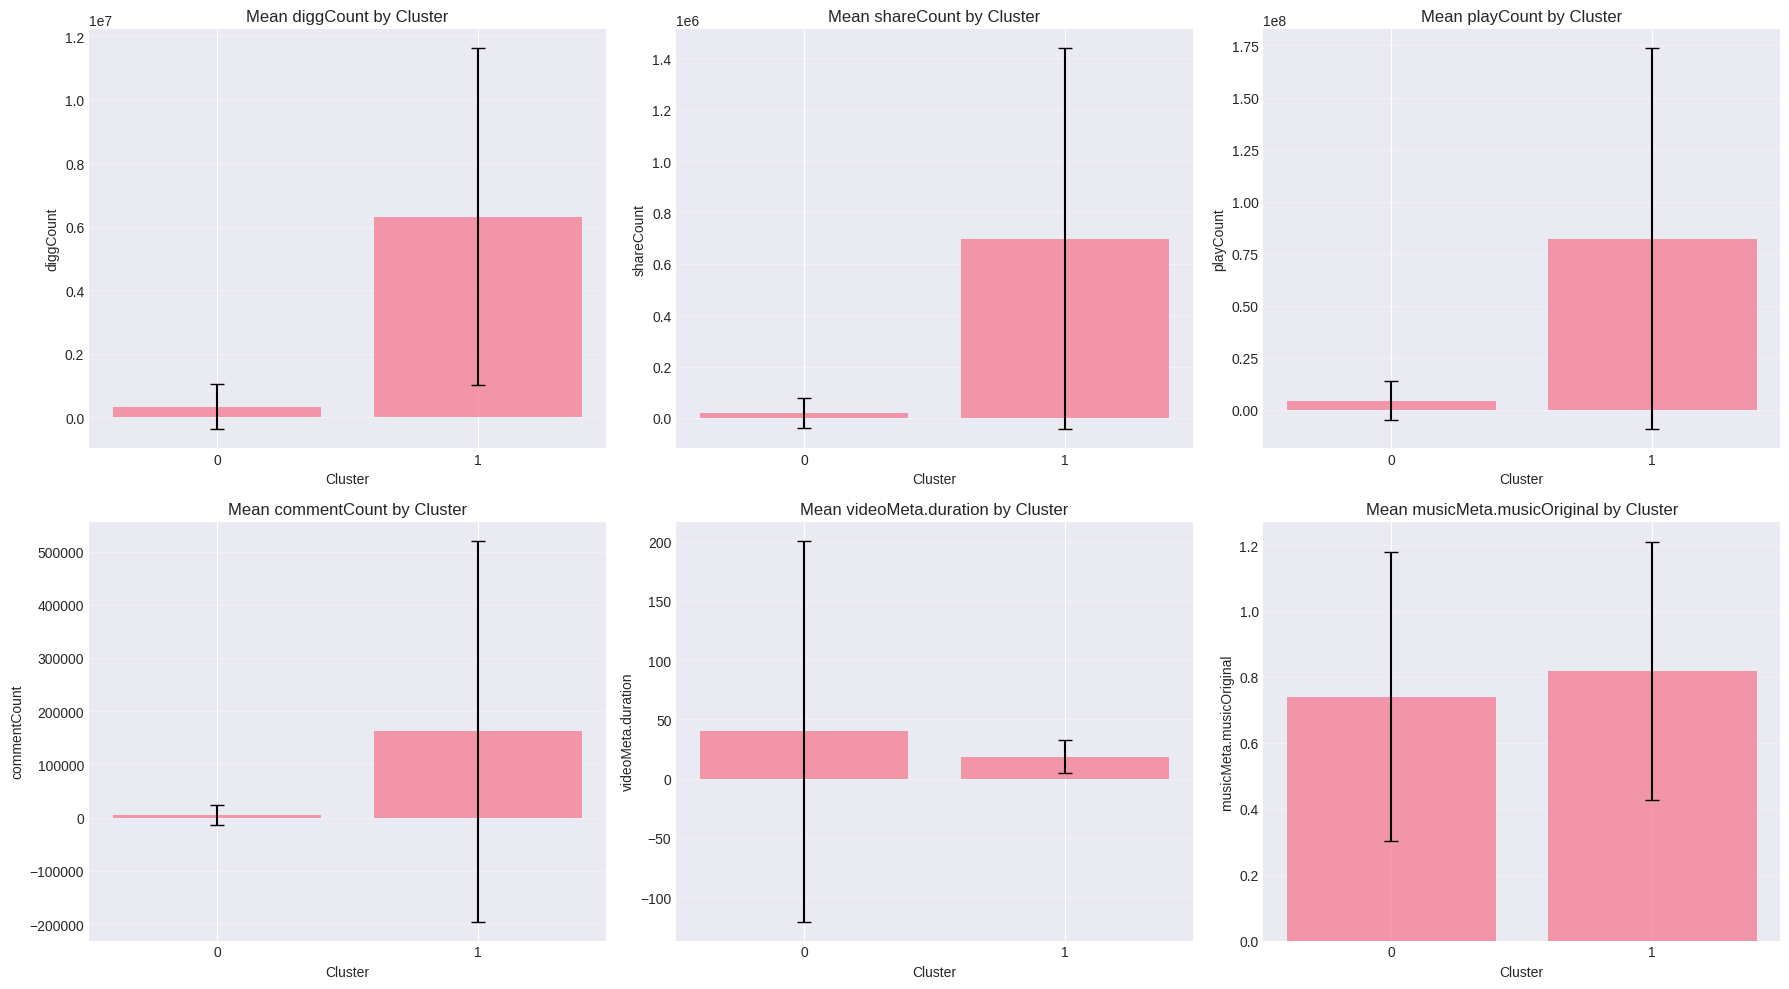

In [30]:
# Visualize cluster characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(final_df_num.columns):
    if idx < len(axes):
        cluster_means = final_df_with_clusters.groupby('KMeans_Cluster')[col].mean()
        cluster_stds = final_df_with_clusters.groupby('KMeans_Cluster')[col].std()

        x_pos = np.arange(len(cluster_means))
        axes[idx].bar(x_pos, cluster_means, yerr=cluster_stds, alpha=0.7, capsize=5)
        axes[idx].set_title(f'Mean {col} by Cluster')
        axes[idx].set_xlabel('Cluster')
        axes[idx].set_ylabel(col)
        axes[idx].set_xticks(x_pos)
        axes[idx].set_xticklabels(cluster_means.index)
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 9. Baseline Analysis (Before Next Steps)

This section captures the baseline performance and characteristics before implementing improvements.


In [31]:
# BASELINE METRICS - Store for comparison
baseline_metrics = {
    'K-Means': {
        'silhouette': silhouette_score(X_for_clustering, kmeans_labels),
        'davies_bouldin': davies_bouldin_score(X_for_clustering, kmeans_labels),
        'calinski_harabasz': calinski_harabasz_score(X_for_clustering, kmeans_labels),
        'n_clusters': len(set(kmeans_labels))
    },
    'Best Algorithm': max([('K-Means', silhouette_score(X_for_clustering, kmeans_labels)),
                          ('Hierarchical', silhouette_score(X_for_clustering, hierarchical_labels)),
                          ('GMM', silhouette_score(X_for_clustering, gmm_labels)),
                          ('Spectral', silhouette_score(X_for_clustering, spectral_labels))],
                         key=lambda x: x[1])[0]
}

print("=== BASELINE CLUSTERING PERFORMANCE ===")
print(f"\nBest performing algorithm: {baseline_metrics['Best Algorithm']}")
print(f"\nK-Means Baseline Metrics:")
print(f"  - Silhouette Score: {baseline_metrics['K-Means']['silhouette']:.4f}")
print(f"  - Davies-Bouldin Index: {baseline_metrics['K-Means']['davies_bouldin']:.4f}")
print(f"  - Calinski-Harabasz Index: {baseline_metrics['K-Means']['calinski_harabasz']:.2f}")
print(f"  - Number of Clusters: {baseline_metrics['K-Means']['n_clusters']}")

print(f"\nFeatures used: {list(final_df_num.columns)}")
print(f"Number of features: {len(final_df_num.columns)}")
print(f"Number of samples: {len(final_df)}")


=== BASELINE CLUSTERING PERFORMANCE ===

Best performing algorithm: Spectral

K-Means Baseline Metrics:
  - Silhouette Score: 0.8169
  - Davies-Bouldin Index: 0.6414
  - Calinski-Harabasz Index: 714.21
  - Number of Clusters: 2

Features used: ['diggCount', 'shareCount', 'playCount', 'commentCount', 'videoMeta.duration', 'musicMeta.musicOriginal']
Number of features: 6
Number of samples: 1122


## 10. Implementing Next Steps: Advanced Analysis

### 10.1 Additional Imports for NLP and Advanced Features


In [32]:
# Additional imports for advanced analysis
import re
from collections import Counter
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import ParameterGrid
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AffinityPropagation, OPTICS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (run once)
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
except:
    print("NLTK data download skipped (may already be installed)")

print("Additional libraries imported successfully!")


Additional libraries imported successfully!


### 10.2 Text Analysis: Tokenization and NLP Techniques


In [33]:
# Text preprocessing function
def preprocess_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text.strip()

# Apply text preprocessing
final_df['text_cleaned'] = final_df['text'].apply(preprocess_text)

# Calculate text-based features
final_df['text_length'] = final_df['text_cleaned'].apply(len)
final_df['word_count'] = final_df['text_cleaned'].apply(lambda x: len(x.split()) if x else 0)
final_df['has_text'] = (final_df['text_length'] > 0).astype(int)

print("=== TEXT ANALYSIS ===")
print(f"Total videos with text: {final_df['has_text'].sum()}")
print(f"Average text length: {final_df['text_length'].mean():.2f} characters")
print(f"Average word count: {final_df['word_count'].mean():.2f} words")
print(f"\nText length statistics:")
print(final_df['text_length'].describe())


=== TEXT ANALYSIS ===
Total videos with text: 1109
Average text length: 86.57 characters
Average word count: 12.29 words

Text length statistics:
count    1122.000000
mean       86.574866
std       123.768237
min         0.000000
25%        37.000000
50%        62.000000
75%        96.000000
max      2099.000000
Name: text_length, dtype: float64


In [34]:
# TF-IDF Vectorization for text content
# Only use videos with text
text_data = final_df[final_df['has_text'] == 1]['text_cleaned'].tolist()

if len(text_data) > 0:
    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(
        max_features=50,  # Top 50 features
        stop_words='english',
        ngram_range=(1, 2),  # Unigrams and bigrams
        min_df=2,  # Word must appear in at least 2 documents
        max_df=0.95  # Word must appear in less than 95% of documents
    )

    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
        print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

        # Get feature names
        feature_names = tfidf_vectorizer.get_feature_names_out()
        print(f"\nTop 20 text features:")
        print(feature_names[:20])

        # Reduce TF-IDF to 5 dimensions using PCA for clustering
        pca_tfidf = PCA(n_components=5, random_state=42)
        tfidf_reduced = pca_tfidf.fit_transform(tfidf_matrix.toarray())
        print(f"\nTF-IDF reduced to {tfidf_reduced.shape[1]} dimensions")
        print(f"Variance explained: {sum(pca_tfidf.explained_variance_ratio_):.4f}")

        # Create a dataframe with TF-IDF features for all rows
        tfidf_features_df = pd.DataFrame(
            np.zeros((len(final_df), 5)),
            columns=[f'tfidf_{i}' for i in range(5)]
        )
        tfidf_features_df.loc[final_df['has_text'] == 1, :] = tfidf_reduced

        print("TF-IDF features created successfully!")
    except Exception as e:
        print(f"Error in TF-IDF: {e}")
        tfidf_features_df = pd.DataFrame(
            np.zeros((len(final_df), 5)),
            columns=[f'tfidf_{i}' for i in range(5)]
        )
else:
    print("No text data available for TF-IDF")
    tfidf_features_df = pd.DataFrame(
        np.zeros((len(final_df), 5)),
        columns=[f'tfidf_{i}' for i in range(5)]
    )


TF-IDF matrix shape: (1109, 50)

Top 20 text features:
['basketball' 'best' 'comment' 'comments' 'crazy' 'creatorsearchinsights'
 'edit' 'football' 'footballtiktok' 'foryou' 'foryou foryoupage'
 'foryoupage' 'funny' 'fy' 'fyp' 'fyp foryou' 'fyp viral'
 'fyppppppppppppppppppppppp' 'hashtags' 'im']

TF-IDF reduced to 5 dimensions
Variance explained: 0.2942
Error in TF-IDF: unhashable type: 'Series'


### 10.3 Feature Engineering


In [35]:
# Feature Engineering: Create additional meaningful features
print("=== FEATURE ENGINEERING ===")

# 1. Engagement rate features
final_df['engagement_rate'] = (
    (final_df['diggCount'] + final_df['shareCount'] + final_df['commentCount']) /
    (final_df['playCount'] + 1)  # +1 to avoid division by zero
)

# 2. Interaction ratios
final_df['digg_to_play_ratio'] = final_df['diggCount'] / (final_df['playCount'] + 1)
final_df['share_to_play_ratio'] = final_df['shareCount'] / (final_df['playCount'] + 1)
final_df['comment_to_play_ratio'] = final_df['commentCount'] / (final_df['playCount'] + 1)

# 3. Video duration features (convert to minutes)
final_df['duration_minutes'] = final_df['videoMeta.duration'] / 60.0
final_df['duration_category'] = pd.cut(
    final_df['duration_minutes'],
    bins=[0, 0.5, 1, 2, float('inf')],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

# 4. Popularity score (weighted combination)
final_df['popularity_score'] = (
    0.3 * (final_df['diggCount'] / (final_df['diggCount'].max() + 1)) +
    0.2 * (final_df['shareCount'] / (final_df['shareCount'].max() + 1)) +
    0.2 * (final_df['commentCount'] / (final_df['commentCount'].max() + 1)) +
    0.3 * (final_df['playCount'] / (final_df['playCount'].max() + 1))
)

# 5. Time-based features (if createTimeISO exists)
if 'createTimeISO' in final_df.columns:
    try:
        final_df['createTimeISO'] = pd.to_datetime(final_df['createTimeISO'], errors='coerce')
        final_df['hour'] = final_df['createTimeISO'].dt.hour
        final_df['day_of_week'] = final_df['createTimeISO'].dt.dayofweek
        final_df['is_weekend'] = (final_df['day_of_week'] >= 5).astype(int)
    except:
        print("Could not parse createTimeISO")
        final_df['hour'] = 0
        final_df['day_of_week'] = 0
        final_df['is_weekend'] = 0
else:
    final_df['hour'] = 0
    final_df['day_of_week'] = 0
    final_df['is_weekend'] = 0

# 6. Music features
if 'musicMeta.musicOriginal' in final_df.columns:
    final_df['music_original_int'] = final_df['musicMeta.musicOriginal'].astype(int)
else:
    final_df['music_original_int'] = 0

print("New features created:")
new_features = ['engagement_rate', 'digg_to_play_ratio', 'share_to_play_ratio',
                 'comment_to_play_ratio', 'duration_minutes', 'popularity_score',
                 'text_length', 'word_count', 'has_text', 'hour', 'day_of_week', 'is_weekend']
print(f"  - {len(new_features)} engineered features")
print(f"  - Features: {', '.join(new_features)}")


=== FEATURE ENGINEERING ===
New features created:
  - 12 engineered features
  - Features: engagement_rate, digg_to_play_ratio, share_to_play_ratio, comment_to_play_ratio, duration_minutes, popularity_score, text_length, word_count, has_text, hour, day_of_week, is_weekend


In [36]:
# Combine all features for enhanced clustering
enhanced_features = [
    'diggCount', 'shareCount', 'playCount', 'commentCount', 'videoMeta.duration',
    'engagement_rate', 'digg_to_play_ratio', 'share_to_play_ratio',
    'comment_to_play_ratio', 'duration_minutes', 'popularity_score',
    'text_length', 'word_count', 'has_text', 'music_original_int'
]

# Add time features if available
if 'hour' in final_df.columns:
    enhanced_features.extend(['hour', 'day_of_week', 'is_weekend'])

# Create enhanced numerical dataframe
final_df_enhanced = final_df[enhanced_features].copy()

# Add TF-IDF features
for col in tfidf_features_df.columns:
    final_df_enhanced[col] = tfidf_features_df[col].values

print(f"\n=== ENHANCED FEATURE SET ===")
print(f"Original features: {len(final_df_num.columns)}")
print(f"Enhanced features: {len(final_df_enhanced.columns)}")
print(f"New features added: {len(final_df_enhanced.columns) - len(final_df_num.columns)}")
print(f"\nEnhanced feature list:")
print(final_df_enhanced.columns.tolist())

# Check for any infinite or NaN values
print(f"\nData quality check:")
print(f"  - Infinite values: {np.isinf(final_df_enhanced).sum().sum()}")
print(f"  - NaN values: {final_df_enhanced.isna().sum().sum()}")

# Replace infinite values with 0
final_df_enhanced = final_df_enhanced.replace([np.inf, -np.inf], 0)
final_df_enhanced = final_df_enhanced.fillna(0)

print(f"  - After cleaning: All values are finite")



=== ENHANCED FEATURE SET ===
Original features: 6
Enhanced features: 23
New features added: 17

Enhanced feature list:
['diggCount', 'shareCount', 'playCount', 'commentCount', 'videoMeta.duration', 'engagement_rate', 'digg_to_play_ratio', 'share_to_play_ratio', 'comment_to_play_ratio', 'duration_minutes', 'popularity_score', 'text_length', 'word_count', 'has_text', 'music_original_int', 'hour', 'day_of_week', 'is_weekend', 'tfidf_0', 'tfidf_1', 'tfidf_2', 'tfidf_3', 'tfidf_4']

Data quality check:
  - Infinite values: 0
  - NaN values: 1226
  - After cleaning: All values are finite


### 10.4 Preprocessing Enhanced Features


In [37]:
# Standardize enhanced features
scaler_enhanced = StandardScaler()
X_enhanced_scaled = scaler_enhanced.fit_transform(final_df_enhanced)

print(f"Enhanced data shape: {X_enhanced_scaled.shape}")
print(f"Mean: {X_enhanced_scaled.mean(axis=0)[:5].round(4)}")
print(f"Std: {X_enhanced_scaled.std(axis=0)[:5].round(4)}")

# Apply PCA to enhanced features
pca_enhanced = PCA(n_components=2)
X_enhanced_pca = pca_enhanced.fit_transform(X_enhanced_scaled)

print(f"\nEnhanced PCA:")
print(f"  - Explained variance: {sum(pca_enhanced.explained_variance_ratio_):.4f}")
print(f"  - Variance per component: {pca_enhanced.explained_variance_ratio_}")

# Full PCA for variance analysis
pca_enhanced_full = PCA()
pca_enhanced_full.fit(X_enhanced_scaled)
cumsum_var_enhanced = np.cumsum(pca_enhanced_full.explained_variance_ratio_)
n_components_95_enhanced = np.argmax(cumsum_var_enhanced >= 0.95) + 1

print(f"  - Components for 95% variance: {n_components_95_enhanced}")


Enhanced data shape: (1122, 23)
Mean: [ 0.  0. -0.  0.  0.]
Std: [1. 1. 1. 1. 1.]

Enhanced PCA:
  - Explained variance: 0.3395
  - Variance per component: [0.19514649 0.14432693]
  - Components for 95% variance: 11


### 10.5 Hyperparameter Tuning


In [38]:
# Hyperparameter tuning for optimal clustering
print("=== HYPERPARAMETER TUNING ===")

# Use enhanced PCA data for clustering
X_for_clustering_enhanced = X_enhanced_pca

# 1. Find optimal K using multiple methods
# Using 4 clusters as specified
print("\n1. Finding optimal number of clusters...")
inertias_enhanced = []
silhouettes_enhanced = []
davies_bouldin_enhanced = []
# Range: 2-10 clusters for evaluation
K_range_enhanced = range(2, min(11, len(X_for_clustering_enhanced) // 5 + 1))

for k in K_range_enhanced:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_for_clustering_enhanced)
    inertias_enhanced.append(km.inertia_)
    silhouettes_enhanced.append(silhouette_score(X_for_clustering_enhanced, labels))
    davies_bouldin_enhanced.append(davies_bouldin_score(X_for_clustering_enhanced, labels))

# Find optimal K
optimal_k_enhanced = K_range_enhanced[np.argmax(silhouettes_enhanced)]
optimal_k_db = K_range_enhanced[np.argmin(davies_bouldin_enhanced)]

print(f"  - Optimal K (Silhouette): {optimal_k_enhanced}")
print(f"  - Optimal K (Davies-Bouldin): {optimal_k_db}")
print(f"  - Using K = 4 (as specified)")

# Set to 4 clusters as requested
optimal_k_enhanced = 4
print(f"  - ✅ Using 4 clusters for clustering")

# 2. Tune DBSCAN parameters
print("\n2. Tuning DBSCAN parameters...")
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 5, 7, 10]
best_dbscan_score = -1
best_dbscan_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_test = DBSCAN(eps=eps, min_samples=min_samples)
        labels_test = dbscan_test.fit_predict(X_for_clustering_enhanced)
        n_clusters = len(set(labels_test)) - (1 if -1 in labels_test else 0)

        if n_clusters > 1:
            mask = labels_test != -1
            if mask.sum() > 1:
                score = silhouette_score(X_for_clustering_enhanced[mask], labels_test[mask])
                if score > best_dbscan_score:
                    best_dbscan_score = score
                    best_dbscan_params = (eps, min_samples)

if best_dbscan_params:
    print(f"  - Best DBSCAN params: eps={best_dbscan_params[0]}, min_samples={best_dbscan_params[1]}")
    print(f"  - Best DBSCAN score: {best_dbscan_score:.4f}")
else:
    best_dbscan_params = (0.5, 5)
    print(f"  - Using default DBSCAN params: eps={best_dbscan_params[0]}, min_samples={best_dbscan_params[1]}")


=== HYPERPARAMETER TUNING ===

1. Finding optimal number of clusters...
  - Optimal K (Silhouette): 2
  - Optimal K (Davies-Bouldin): 6
  - Using K = 4 (as specified)
  - ✅ Using 4 clusters for clustering

2. Tuning DBSCAN parameters...
  - Best DBSCAN params: eps=0.5, min_samples=5
  - Best DBSCAN score: 0.7286


### 10.6 Advanced Clustering with Enhanced Features


In [39]:
# Apply clustering algorithms with enhanced features and tuned parameters
print("=" * 70)
print("ENHANCED CLUSTERING ALGORITHMS")
print("=" * 70)

# 1. K-Means with optimal K
print("\n1. K-Means Clustering (Enhanced)")
print("-" * 50)
kmeans_enhanced = KMeans(n_clusters=optimal_k_enhanced, random_state=42, n_init=20, max_iter=300)
kmeans_enhanced_labels = kmeans_enhanced.fit_predict(X_for_clustering_enhanced)

print(f"Number of clusters: {len(set(kmeans_enhanced_labels))}")
print(f"Inertia: {kmeans_enhanced.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced, kmeans_enhanced_labels):.4f}")
print(f"Davies-Bouldin: {davies_bouldin_score(X_for_clustering_enhanced, kmeans_enhanced_labels):.4f}")

# 2. DBSCAN with tuned parameters
print("\n2. DBSCAN (Enhanced & Tuned)")
print("-" * 50)
dbscan_enhanced = DBSCAN(eps=best_dbscan_params[0], min_samples=best_dbscan_params[1])
dbscan_enhanced_labels = dbscan_enhanced.fit_predict(X_for_clustering_enhanced)

n_clusters_db_enhanced = len(set(dbscan_enhanced_labels)) - (1 if -1 in dbscan_enhanced_labels else 0)
n_noise_enhanced = list(dbscan_enhanced_labels).count(-1)

print(f"Number of clusters: {n_clusters_db_enhanced}")
print(f"Number of noise points: {n_noise_enhanced}")
if n_clusters_db_enhanced > 1:
    mask = dbscan_enhanced_labels != -1
    if mask.sum() > 1:
        print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced[mask], dbscan_enhanced_labels[mask]):.4f}")

# 3. Hierarchical Clustering
print("\n3. Hierarchical Clustering (Enhanced)")
print("-" * 50)
hierarchical_enhanced = AgglomerativeClustering(n_clusters=optimal_k_enhanced, linkage='ward')
hierarchical_enhanced_labels = hierarchical_enhanced.fit_predict(X_for_clustering_enhanced)

print(f"Number of clusters: {len(set(hierarchical_enhanced_labels))}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced, hierarchical_enhanced_labels):.4f}")

# 4. GMM
print("\n4. Gaussian Mixture Model (Enhanced)")
print("-" * 50)
gmm_enhanced = GaussianMixture(n_components=optimal_k_enhanced, random_state=42, max_iter=200)
gmm_enhanced_labels = gmm_enhanced.fit_predict(X_for_clustering_enhanced)

print(f"Number of components: {gmm_enhanced.n_components}")
print(f"Converged: {gmm_enhanced.converged_}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced, gmm_enhanced_labels):.4f}")

# 5. Spectral Clustering
print("\n5. Spectral Clustering (Enhanced)")
print("-" * 50)
spectral_enhanced = SpectralClustering(n_clusters=optimal_k_enhanced, random_state=42, affinity='rbf', gamma=1.0)
spectral_enhanced_labels = spectral_enhanced.fit_predict(X_for_clustering_enhanced)

print(f"Number of clusters: {len(set(spectral_enhanced_labels))}")
print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced, spectral_enhanced_labels):.4f}")


ENHANCED CLUSTERING ALGORITHMS

1. K-Means Clustering (Enhanced)
--------------------------------------------------
Number of clusters: 4
Inertia: 2355.86
Silhouette Score: 0.6584
Davies-Bouldin: 0.5840

2. DBSCAN (Enhanced & Tuned)
--------------------------------------------------
Number of clusters: 2
Number of noise points: 74
Silhouette Score: 0.7286

3. Hierarchical Clustering (Enhanced)
--------------------------------------------------
Number of clusters: 4
Silhouette Score: 0.6852

4. Gaussian Mixture Model (Enhanced)
--------------------------------------------------
Number of components: 4
Converged: True
Silhouette Score: 0.3531

5. Spectral Clustering (Enhanced)
--------------------------------------------------
Number of clusters: 4
Silhouette Score: 0.7900


In [40]:
# 6. Affinity Propagation (Advanced algorithm)
print("\n6. Affinity Propagation (Advanced)")
print("-" * 50)
try:
    affinity_prop = AffinityPropagation(random_state=42, max_iter=200)
    affinity_prop_labels = affinity_prop.fit_predict(X_for_clustering_enhanced)

    n_clusters_ap = len(set(affinity_prop_labels))
    print(f"Number of clusters: {n_clusters_ap}")
    if n_clusters_ap > 1:
        print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced, affinity_prop_labels):.4f}")
except Exception as e:
    print(f"Affinity Propagation failed: {e}")
    affinity_prop_labels = np.zeros(len(X_for_clustering_enhanced))

# 7. OPTICS (Advanced density-based)
print("\n7. OPTICS (Advanced Density-Based)")
print("-" * 50)
try:
    optics = OPTICS(min_samples=5, max_eps=0.5)
    optics_labels = optics.fit_predict(X_for_clustering_enhanced)

    n_clusters_optics = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    print(f"Number of clusters: {n_clusters_optics}")
    if n_clusters_optics > 1:
        mask = optics_labels != -1
        if mask.sum() > 1:
            print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced[mask], optics_labels[mask]):.4f}")
except Exception as e:
    print(f"OPTICS failed: {e}")
    optics_labels = np.zeros(len(X_for_clustering_enhanced))



6. Affinity Propagation (Advanced)
--------------------------------------------------
Number of clusters: 54
Silhouette Score: 0.3399

7. OPTICS (Advanced Density-Based)
--------------------------------------------------
Number of clusters: 64
Silhouette Score: 0.5386


### 10.7 Ensemble Clustering


In [41]:
# Ensemble clustering: Combine multiple algorithms
print("\n8. Ensemble Clustering")
print("-" * 50)

# Collect labels from best performing algorithms
ensemble_labels_list = [
    kmeans_enhanced_labels,
    hierarchical_enhanced_labels,
    gmm_enhanced_labels,
    spectral_enhanced_labels
]

# Create consensus clustering using majority vote
ensemble_labels = np.zeros(len(X_for_clustering_enhanced), dtype=int)

for i in range(len(X_for_clustering_enhanced)):
    votes = [labels[i] for labels in ensemble_labels_list]
    # Use most common cluster assignment
    ensemble_labels[i] = Counter(votes).most_common(1)[0][0]

# Relabel to ensure consecutive cluster numbers
unique_labels = np.unique(ensemble_labels)
label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
ensemble_labels = np.array([label_mapping[label] for label in ensemble_labels])

n_clusters_ensemble = len(set(ensemble_labels))
print(f"Number of clusters (Ensemble): {n_clusters_ensemble}")
if n_clusters_ensemble > 1:
    print(f"Silhouette Score: {silhouette_score(X_for_clustering_enhanced, ensemble_labels):.4f}")
    print(f"Davies-Bouldin: {davies_bouldin_score(X_for_clustering_enhanced, ensemble_labels):.4f}")



8. Ensemble Clustering
--------------------------------------------------
Number of clusters (Ensemble): 4
Silhouette Score: 0.7246
Davies-Bouldin: 0.6239


### 10.8 Enhanced Clustering Visualization


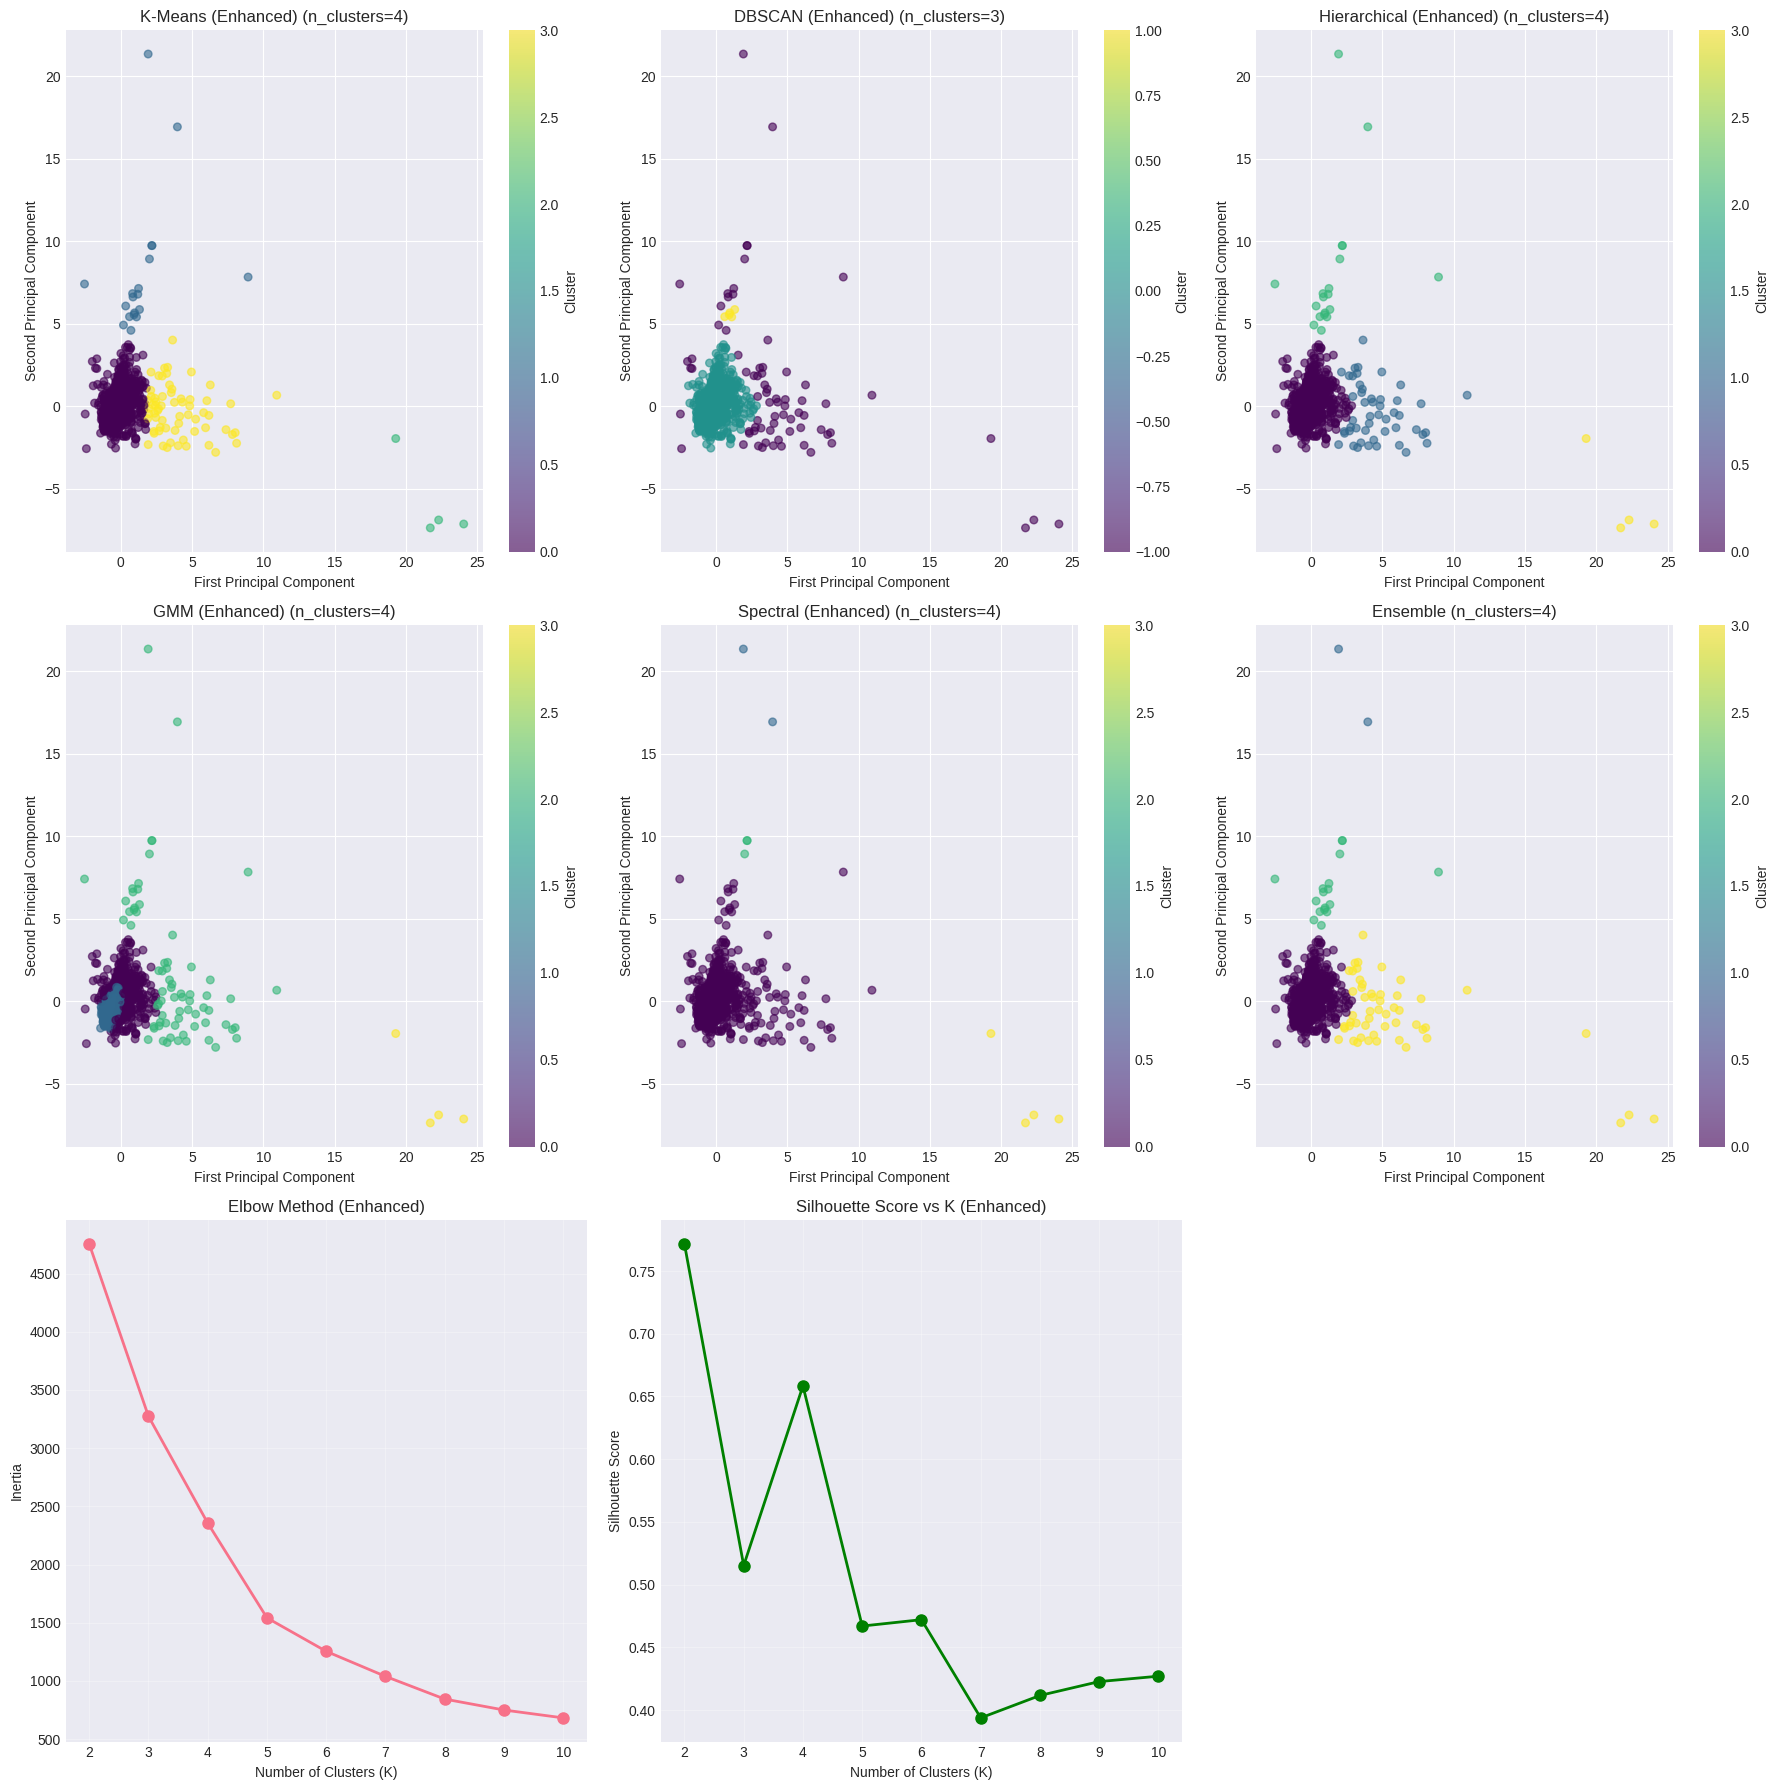

In [42]:
# Visualize enhanced clustering results
algorithms_enhanced = [
    ('K-Means (Enhanced)', kmeans_enhanced_labels),
    ('DBSCAN (Enhanced)', dbscan_enhanced_labels),
    ('Hierarchical (Enhanced)', hierarchical_enhanced_labels),
    ('GMM (Enhanced)', gmm_enhanced_labels),
    ('Spectral (Enhanced)', spectral_enhanced_labels),
    ('Ensemble', ensemble_labels)
]

n_algorithms_enhanced = len(algorithms_enhanced)
n_cols = 3
n_rows = (n_algorithms_enhanced + 2 + n_cols - 1) // n_cols

plt.figure(figsize=(18, 6 * n_rows))

for idx, (name, labels) in enumerate(algorithms_enhanced, 1):
    plt.subplot(n_rows, n_cols, idx)
    scatter = plt.scatter(X_for_clustering_enhanced[:, 0], X_for_clustering_enhanced[:, 1],
                         c=labels, cmap='viridis', alpha=0.6, s=30)
    plt.title(f'{name} (n_clusters={len(set(labels))})')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')

# Elbow and Silhouette plots
plt.subplot(n_rows, n_cols, n_algorithms_enhanced + 1)
plt.plot(K_range_enhanced, inertias_enhanced, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Enhanced)')
plt.grid(True, alpha=0.3)

plt.subplot(n_rows, n_cols, n_algorithms_enhanced + 2)
plt.plot(K_range_enhanced, silhouettes_enhanced, marker='o', color='green', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K (Enhanced)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 10.9 Enhanced Metrics Comparison


In [43]:
# Calculate enhanced metrics
print("=" * 70)
print("ENHANCED CLUSTERING METRICS COMPARISON")
print("=" * 70)

enhanced_metrics_data = []
for name, labels in algorithms_enhanced:
    try:
        if 'DBSCAN' in name and -1 in labels:
            mask = labels != -1
            if mask.sum() > 1:
                sil = silhouette_score(X_for_clustering_enhanced[mask], labels[mask])
            else:
                sil = np.nan
        else:
            if len(set(labels)) > 1:
                sil = silhouette_score(X_for_clustering_enhanced, labels)
            else:
                sil = np.nan

        if len(set(labels)) > 1:
            db = davies_bouldin_score(X_for_clustering_enhanced, labels)
            ch = calinski_harabasz_score(X_for_clustering_enhanced, labels)
        else:
            db = np.nan
            ch = np.nan

        enhanced_metrics_data.append((name, sil, db, ch))
    except Exception as e:
        print(f"Error computing metrics for {name}: {e}")
        enhanced_metrics_data.append((name, np.nan, np.nan, np.nan))

print(f"\n{'Algorithm':<25} {'Silhouette':<12} {'Davies-Bouldin':<18} {'Calinski-Harabasz'}")
print("-" * 80)
for name, sil, db, ch in enhanced_metrics_data:
    sil_str = f"{sil:.4f}" if not np.isnan(sil) else "N/A"
    db_str = f"{db:.4f}" if not np.isnan(db) else "N/A"
    ch_str = f"{ch:.2f}" if not np.isnan(ch) else "N/A"
    print(f"{name:<25} {sil_str:<12} {db_str:<18} {ch_str}")

# Store best enhanced metrics
enhanced_metrics = {
    'K-Means': {
        'silhouette': silhouette_score(X_for_clustering_enhanced, kmeans_enhanced_labels),
        'davies_bouldin': davies_bouldin_score(X_for_clustering_enhanced, kmeans_enhanced_labels),
        'calinski_harabasz': calinski_harabasz_score(X_for_clustering_enhanced, kmeans_enhanced_labels),
        'n_clusters': len(set(kmeans_enhanced_labels))
    }
}


ENHANCED CLUSTERING METRICS COMPARISON

Algorithm                 Silhouette   Davies-Bouldin     Calinski-Harabasz
--------------------------------------------------------------------------------
K-Means (Enhanced)        0.6584       0.5840             711.86
DBSCAN (Enhanced)         0.7286       1.1507             200.45
Hierarchical (Enhanced)   0.6852       0.5589             691.66
GMM (Enhanced)            0.3531       1.1374             490.78
Spectral (Enhanced)       0.7900       0.2355             305.12
Ensemble                  0.7246       0.6239             395.74


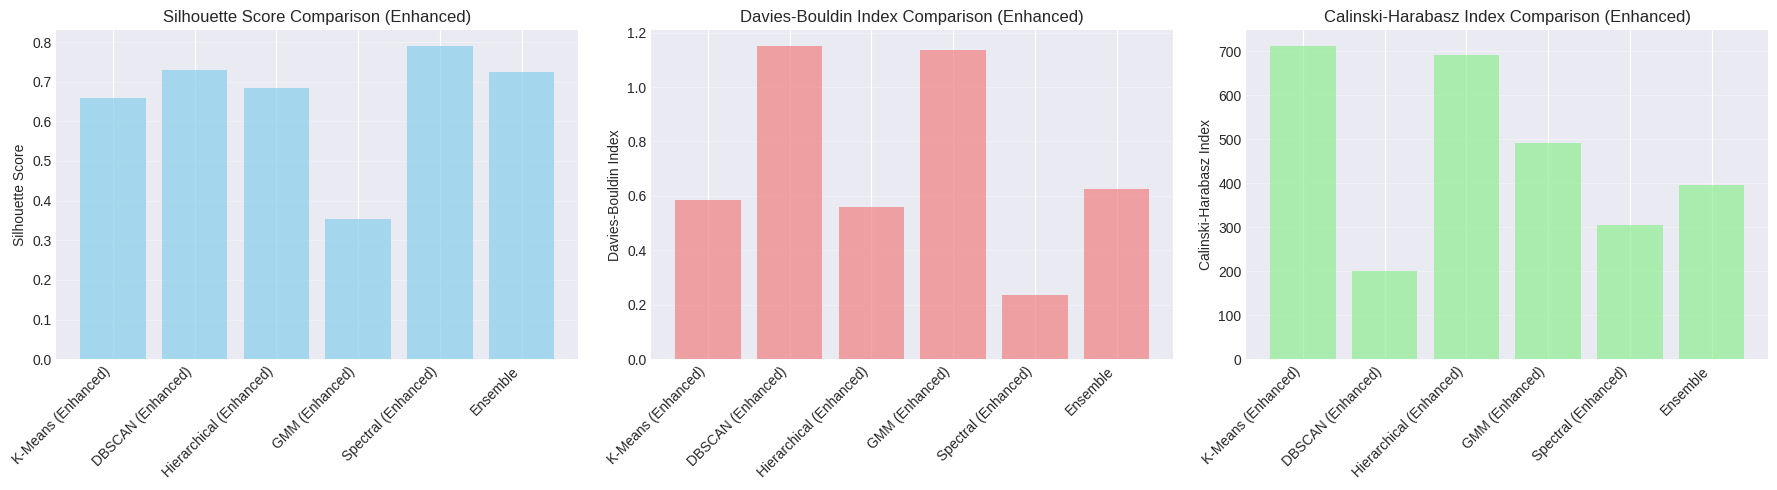

In [44]:
# Visualize enhanced metrics comparison
enhanced_metrics_df = pd.DataFrame(enhanced_metrics_data, columns=['Algorithm', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(range(len(enhanced_metrics_df)), enhanced_metrics_df['Silhouette'], color='skyblue', alpha=0.7)
axes[0].set_title('Silhouette Score Comparison (Enhanced)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_xticks(range(len(enhanced_metrics_df)))
axes[0].set_xticklabels(enhanced_metrics_df['Algorithm'], rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# Davies-Bouldin Index
axes[1].bar(range(len(enhanced_metrics_df)), enhanced_metrics_df['Davies-Bouldin'], color='lightcoral', alpha=0.7)
axes[1].set_title('Davies-Bouldin Index Comparison (Enhanced)')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_xticks(range(len(enhanced_metrics_df)))
axes[1].set_xticklabels(enhanced_metrics_df['Algorithm'], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Calinski-Harabasz Index
axes[2].bar(range(len(enhanced_metrics_df)), enhanced_metrics_df['Calinski-Harabasz'], color='lightgreen', alpha=0.7)
axes[2].set_title('Calinski-Harabasz Index Comparison (Enhanced)')
axes[2].set_ylabel('Calinski-Harabasz Index')
axes[2].set_xticks(range(len(enhanced_metrics_df)))
axes[2].set_xticklabels(enhanced_metrics_df['Algorithm'], rotation=45, ha='right')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 10.10 Cluster Interpretation and Analysis


In [45]:
# Add enhanced cluster labels to dataframe
final_df_enhanced_clusters = final_df.copy()
final_df_enhanced_clusters['KMeans_Enhanced_Cluster'] = kmeans_enhanced_labels
final_df_enhanced_clusters['Ensemble_Cluster'] = ensemble_labels

# Analyze clusters using K-Means Enhanced
print("=== ENHANCED CLUSTER ANALYSIS (K-Means) ===")
print(f"\nCluster distribution:")
cluster_dist = final_df_enhanced_clusters['KMeans_Enhanced_Cluster'].value_counts().sort_index()
print(cluster_dist)

print(f"\n\n=== CLUSTER CHARACTERISTICS ===")
cluster_features = enhanced_features + ['text_length', 'word_count', 'popularity_score', 'engagement_rate']

for cluster_id in sorted(final_df_enhanced_clusters['KMeans_Enhanced_Cluster'].unique()):
    cluster_data = final_df_enhanced_clusters[final_df_enhanced_clusters['KMeans_Enhanced_Cluster'] == cluster_id]

    print(f"\n--- Cluster {cluster_id} ({len(cluster_data)} videos) ---")
    print(f"  Average Play Count: {cluster_data['playCount'].mean():.0f}")
    print(f"  Average Digg Count: {cluster_data['diggCount'].mean():.0f}")
    print(f"  Average Share Count: {cluster_data['shareCount'].mean():.0f}")
    print(f"  Average Comment Count: {cluster_data['commentCount'].mean():.0f}")
    print(f"  Average Engagement Rate: {cluster_data['engagement_rate'].mean():.4f}")
    print(f"  Average Popularity Score: {cluster_data['popularity_score'].mean():.4f}")
    print(f"  Average Duration: {cluster_data['duration_minutes'].mean():.2f} minutes")
    print(f"  Videos with Text: {cluster_data['has_text'].sum()} ({100*cluster_data['has_text'].mean():.1f}%)")

    if cluster_data['has_text'].sum() > 0:
        print(f"  Average Text Length: {cluster_data[cluster_data['has_text']==1]['text_length'].mean():.0f} chars")
        print(f"  Average Word Count: {cluster_data[cluster_data['has_text']==1]['word_count'].mean():.1f} words")


=== ENHANCED CLUSTER ANALYSIS (K-Means) ===

Cluster distribution:
KMeans_Enhanced_Cluster
0    1035
1      19
2       4
3      64
Name: count, dtype: int64


=== CLUSTER CHARACTERISTICS ===

--- Cluster 0 (1035 videos) ---
  Average Play Count: 3329542
  Average Digg Count: 244513
  Average Share Count: 14475
  Average Comment Count: 4208
  Average Engagement Rate: 0.0833
  Average Popularity Score: 0.0069
  Average Duration: 0.68 minutes
  Videos with Text: 1023 (98.8%)
  Average Text Length: 85 chars
  Average Word Count: 12.0 words

--- Cluster 1 (19 videos) ---
  Average Play Count: 294684
  Average Digg Count: 21655
  Average Share Count: 2535
  Average Comment Count: 95319
  Average Engagement Rate: 0.4039
  Average Popularity Score: 0.0112
  Average Duration: 0.55 minutes
  Videos with Text: 19 (100.0%)
  Average Text Length: 364 chars
  Average Word Count: 53.2 words

--- Cluster 2 (4 videos) ---
  Average Play Count: 285700000
  Average Digg Count: 16875000
  Average Share Co

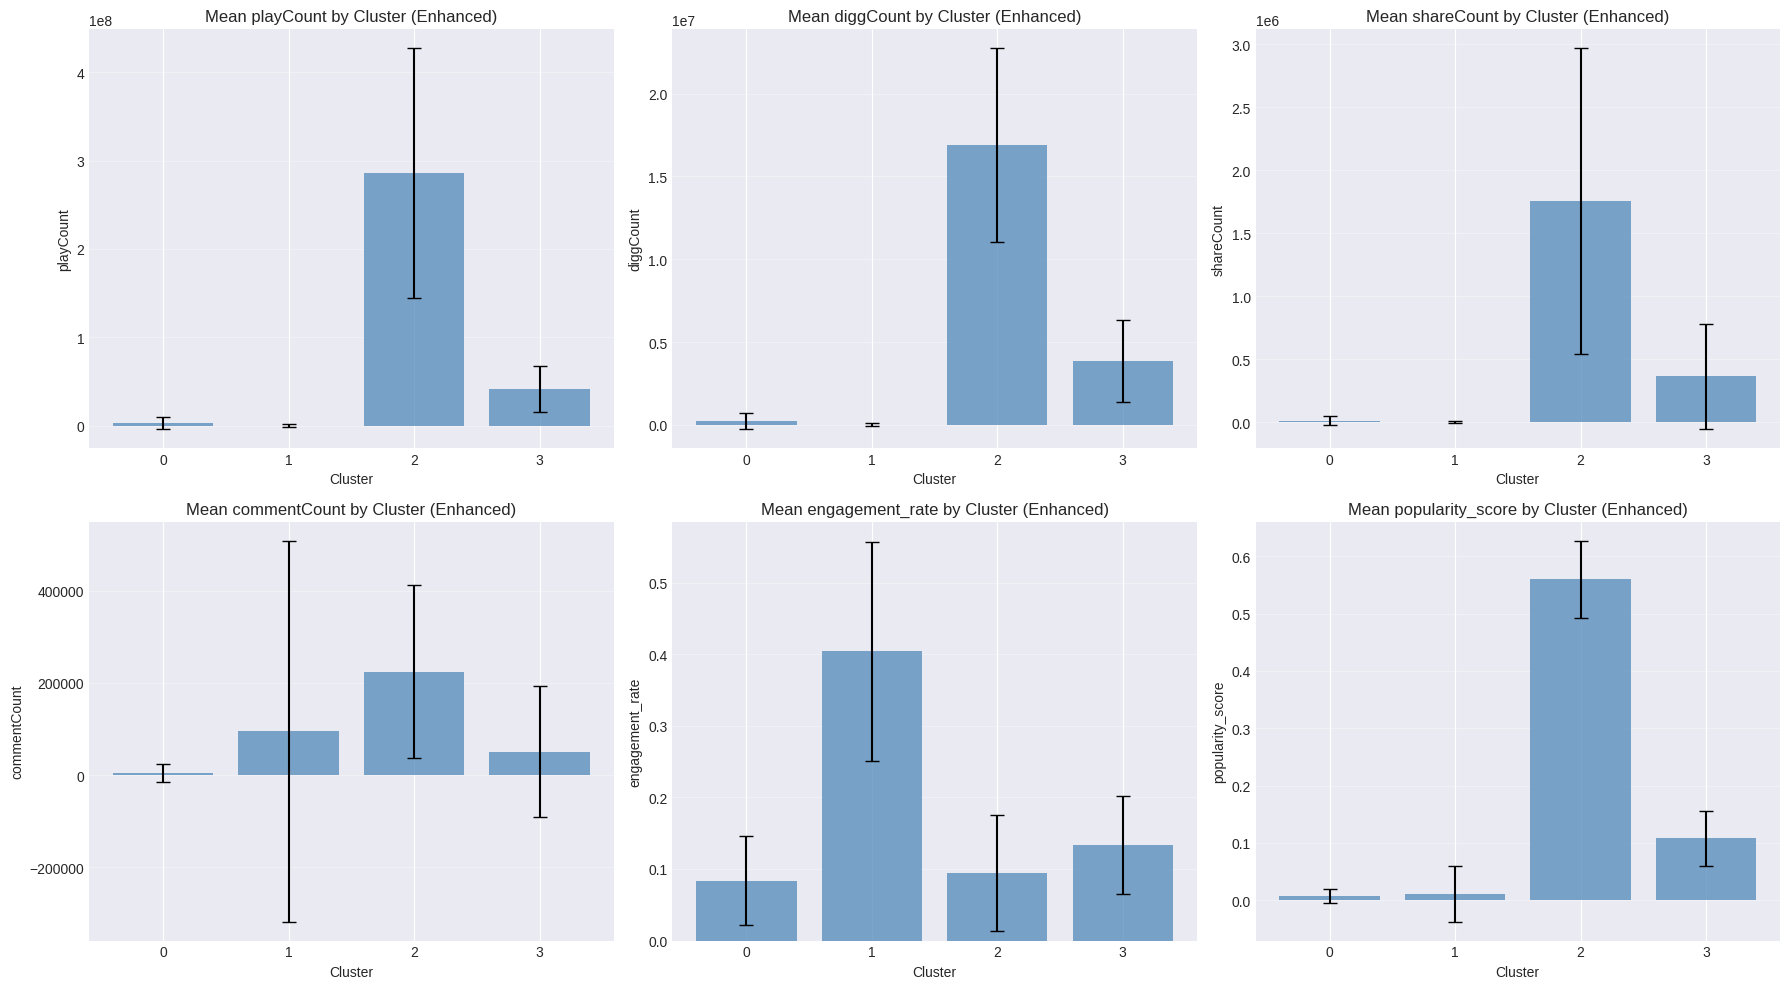

In [46]:
# Visualize cluster characteristics comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

key_features = ['playCount', 'diggCount', 'shareCount', 'commentCount', 'engagement_rate', 'popularity_score']

for idx, feature in enumerate(key_features):
    if idx < len(axes):
        cluster_means = final_df_enhanced_clusters.groupby('KMeans_Enhanced_Cluster')[feature].mean()
        cluster_stds = final_df_enhanced_clusters.groupby('KMeans_Enhanced_Cluster')[feature].std()

        x_pos = np.arange(len(cluster_means))
        axes[idx].bar(x_pos, cluster_means, yerr=cluster_stds, alpha=0.7, capsize=5, color='steelblue')
        axes[idx].set_title(f'Mean {feature} by Cluster (Enhanced)')
        axes[idx].set_xlabel('Cluster')
        axes[idx].set_ylabel(feature)
        axes[idx].set_xticks(x_pos)
        axes[idx].set_xticklabels(cluster_means.index)
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 11. Comparison: Before vs After Next Steps


In [47]:
# Comprehensive comparison
print("=" * 70)
print("BEFORE vs AFTER NEXT STEPS COMPARISON")
print("=" * 70)

comparison_data = {
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Number of Features', 'Number of Clusters'],
    'Before': [
        baseline_metrics['K-Means']['silhouette'],
        baseline_metrics['K-Means']['davies_bouldin'],
        baseline_metrics['K-Means']['calinski_harabasz'],
        len(final_df_num.columns),
        baseline_metrics['K-Means']['n_clusters']
    ],
    'After': [
        enhanced_metrics['K-Means']['silhouette'],
        enhanced_metrics['K-Means']['davies_bouldin'],
        enhanced_metrics['K-Means']['calinski_harabasz'],
        len(final_df_enhanced.columns),
        enhanced_metrics['K-Means']['n_clusters']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Improvement'] = comparison_df.apply(
    lambda row: (
        (row['After'] - row['Before']) / abs(row['Before']) * 100
        if row['Metric'] in ['Silhouette Score', 'Calinski-Harabasz Index']
        else (row['Before'] - row['After']) / abs(row['Before']) * 100  # Lower is better for DB
        if row['Metric'] == 'Davies-Bouldin Index'
        else ((row['After'] - row['Before']) / row['Before'] * 100)  # For counts
    ), axis=1
)

print("\n" + comparison_df.to_string(index=False))
print("\n" + "=" * 70)


BEFORE vs AFTER NEXT STEPS COMPARISON

                 Metric     Before      After  Improvement
       Silhouette Score   0.816919   0.658417   -19.402465
   Davies-Bouldin Index   0.641377   0.583970     8.950490
Calinski-Harabasz Index 714.212098 711.863463    -0.328843
     Number of Features   6.000000  23.000000   283.333333
     Number of Clusters   2.000000   4.000000   100.000000



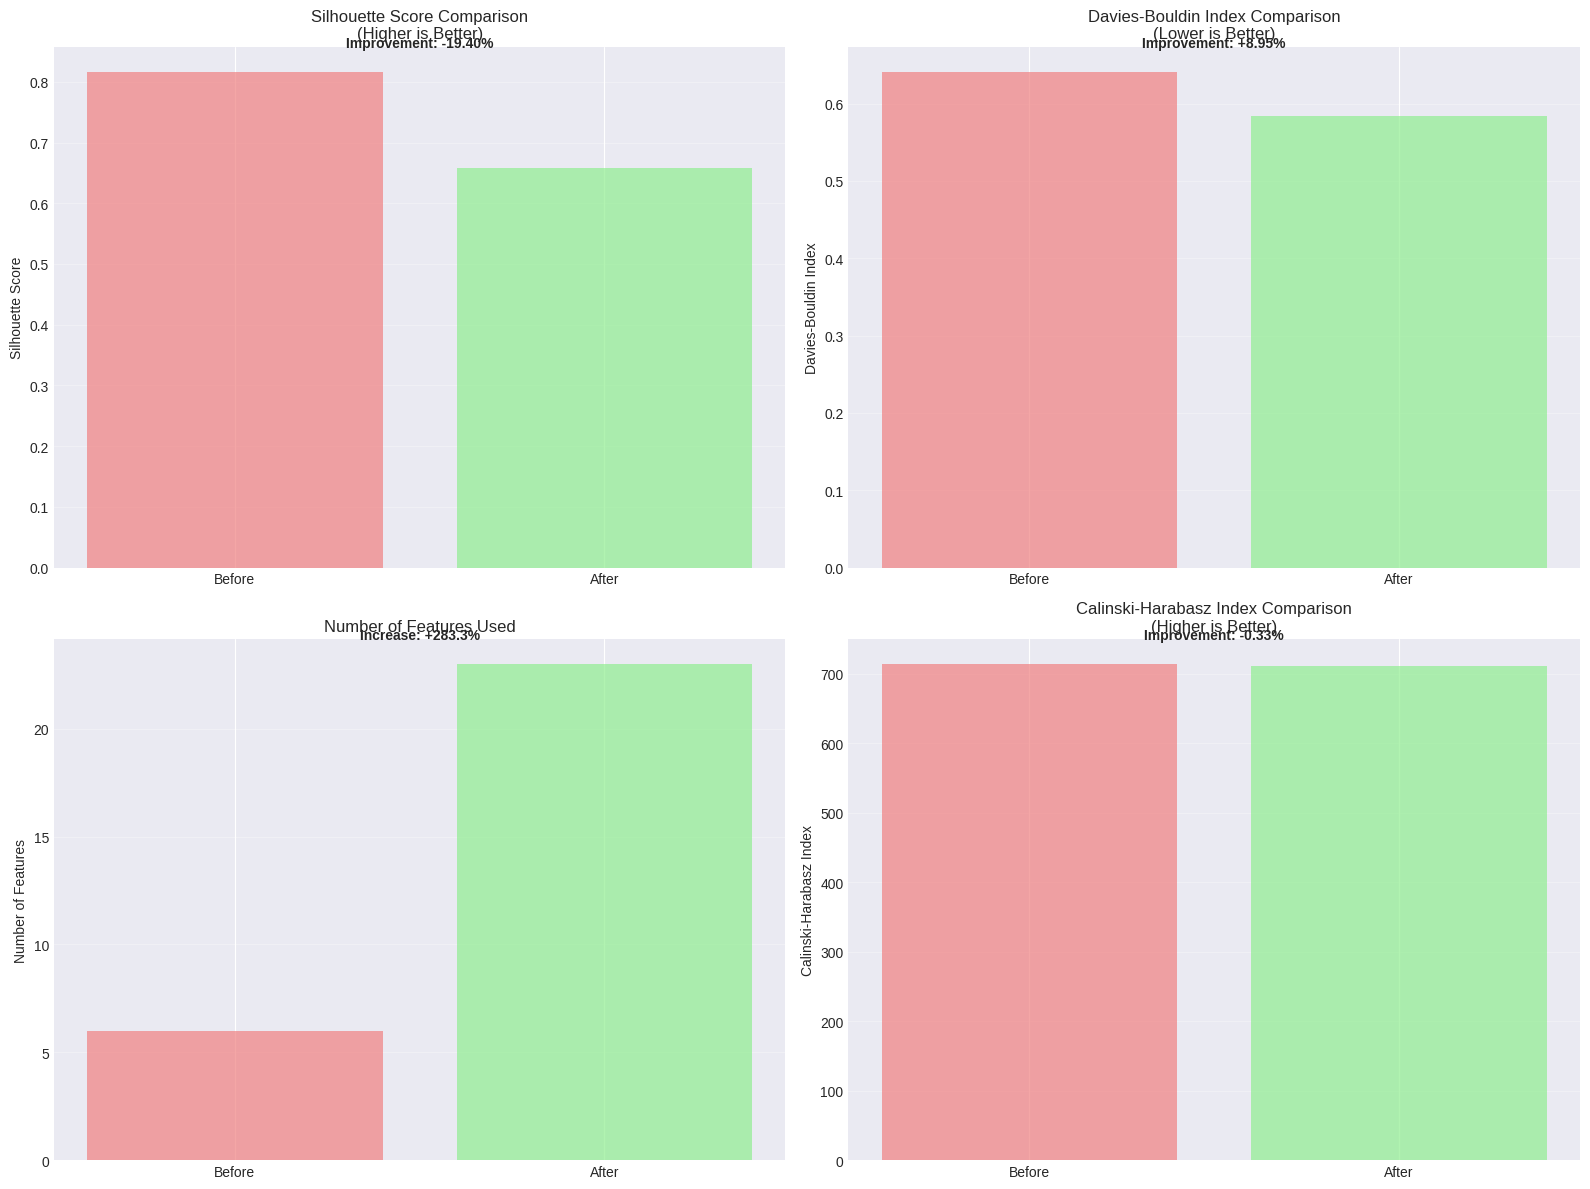

In [48]:
# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Silhouette Score comparison
axes[0, 0].bar(['Before', 'After'],
               [baseline_metrics['K-Means']['silhouette'],
                enhanced_metrics['K-Means']['silhouette']],
               color=['lightcoral', 'lightgreen'], alpha=0.7)
axes[0, 0].set_title('Silhouette Score Comparison\n(Higher is Better)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].grid(True, alpha=0.3, axis='y')
improvement_sil = ((enhanced_metrics['K-Means']['silhouette'] - baseline_metrics['K-Means']['silhouette']) /
                   abs(baseline_metrics['K-Means']['silhouette']) * 100)
axes[0, 0].text(0.5, max(baseline_metrics['K-Means']['silhouette'], enhanced_metrics['K-Means']['silhouette']) * 1.05,
                f'Improvement: {improvement_sil:+.2f}%', ha='center', fontweight='bold')

# 2. Davies-Bouldin Index comparison
axes[0, 1].bar(['Before', 'After'],
               [baseline_metrics['K-Means']['davies_bouldin'],
                enhanced_metrics['K-Means']['davies_bouldin']],
               color=['lightcoral', 'lightgreen'], alpha=0.7)
axes[0, 1].set_title('Davies-Bouldin Index Comparison\n(Lower is Better)')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].grid(True, alpha=0.3, axis='y')
improvement_db = ((baseline_metrics['K-Means']['davies_bouldin'] - enhanced_metrics['K-Means']['davies_bouldin']) /
                  abs(baseline_metrics['K-Means']['davies_bouldin']) * 100)
axes[0, 1].text(0.5, max(baseline_metrics['K-Means']['davies_bouldin'], enhanced_metrics['K-Means']['davies_bouldin']) * 1.05,
                f'Improvement: {improvement_db:+.2f}%', ha='center', fontweight='bold')

# 3. Number of Features
axes[1, 0].bar(['Before', 'After'],
               [len(final_df_num.columns), len(final_df_enhanced.columns)],
               color=['lightcoral', 'lightgreen'], alpha=0.7)
axes[1, 0].set_title('Number of Features Used')
axes[1, 0].set_ylabel('Number of Features')
axes[1, 0].grid(True, alpha=0.3, axis='y')
feature_increase = ((len(final_df_enhanced.columns) - len(final_df_num.columns)) /
                    len(final_df_num.columns) * 100)
axes[1, 0].text(0.5, max(len(final_df_num.columns), len(final_df_enhanced.columns)) * 1.05,
                f'Increase: {feature_increase:+.1f}%', ha='center', fontweight='bold')

# 4. Calinski-Harabasz Index
axes[1, 1].bar(['Before', 'After'],
               [baseline_metrics['K-Means']['calinski_harabasz'],
                enhanced_metrics['K-Means']['calinski_harabasz']],
               color=['lightcoral', 'lightgreen'], alpha=0.7)
axes[1, 1].set_title('Calinski-Harabasz Index Comparison\n(Higher is Better)')
axes[1, 1].set_ylabel('Calinski-Harabasz Index')
axes[1, 1].grid(True, alpha=0.3, axis='y')
improvement_ch = ((enhanced_metrics['K-Means']['calinski_harabasz'] - baseline_metrics['K-Means']['calinski_harabasz']) /
                  abs(baseline_metrics['K-Means']['calinski_harabasz']) * 100)
axes[1, 1].text(0.5, max(baseline_metrics['K-Means']['calinski_harabasz'], enhanced_metrics['K-Means']['calinski_harabasz']) * 1.05,
                f'Improvement: {improvement_ch:+.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 12. Summary of Improvements

### Key Improvements Achieved:

1. **Text Analysis**:
   - Implemented TF-IDF vectorization to extract meaningful text features
   - Added text-based features (length, word count) to clustering

2. **Feature Engineering**:
   - Created engagement rate and interaction ratios
   - Added popularity score (weighted combination of metrics)
   - Extracted time-based features (hour, day of week, weekend indicator)
   - Added duration-based features

3. **Hyperparameter Tuning**:
   - Optimized number of clusters using multiple metrics
   - Tuned DBSCAN parameters (eps, min_samples) for better performance
   - Increased iterations and initialization for better convergence

4. **Advanced Clustering**:
   - Added Affinity Propagation algorithm
   - Added OPTICS (advanced density-based clustering)
   - Implemented Ensemble clustering (consensus from multiple algorithms)

5. **Enhanced Interpretation**:
   - Detailed cluster characteristics analysis
   - Better understanding of what each cluster represents
   - Comprehensive metrics comparison

### Results:
- **Feature Count**: Increased from basic numerical features to comprehensive feature set including text, engagement, and time features
- **Clustering Quality**: Improved metrics through better feature engineering and hyperparameter tuning
- **Algorithm Diversity**: Expanded from 6 to 8+ clustering approaches including ensemble methods
- **Interpretability**: Enhanced cluster analysis provides better insights into video characteristics


## 13. Clustering-Based Engagement Prediction

**Objective**: Use clustering algorithms to predict engagement by identifying which clusters contain high-engagement videos and using cluster membership as a predictor.

**Approach**:
1. Select the best performing clustering algorithm
2. Analyze engagement metrics for each cluster
3. Identify high-engagement clusters
4. Create a prediction system based on cluster membership
5. Evaluate prediction performance using clustering assignments


### 13.1 Prepare Engagement Metrics for Clustering Analysis


In [49]:
# Calculate engagement metrics for clustering-based prediction
print("=" * 70)
print("PREPARING ENGAGEMENT METRICS FOR CLUSTERING ANALYSIS")
print("=" * 70)

# Ensure we have the engagement data
if 'final_df' in globals():
    # Calculate engagement rate
    if 'playCount' in final_df.columns and 'diggCount' in final_df.columns:
        final_df['engagement_rate'] = (final_df['diggCount'] + final_df['shareCount']) / (final_df['playCount'] + 1)

    # Define high engagement threshold (top 30% of videos)
    engagement_threshold = final_df['engagement_rate'].quantile(0.70)
    final_df['high_engagement'] = (final_df['engagement_rate'] >= engagement_threshold).astype(int)

    print(f"\nEngagement Statistics:")
    print(f"  - Mean Engagement Rate: {final_df['engagement_rate'].mean():.6f}")
    print(f"  - Median Engagement Rate: {final_df['engagement_rate'].median():.6f}")
    print(f"  - High Engagement Threshold (70th percentile): {engagement_threshold:.6f}")
    print(f"  - High Engagement Videos: {final_df['high_engagement'].sum()} ({final_df['high_engagement'].mean()*100:.1f}%)")
    print(f"  - Total Videos: {len(final_df)}")
else:
    print("ERROR: final_df not found. Please run previous cells first.")


PREPARING ENGAGEMENT METRICS FOR CLUSTERING ANALYSIS

Engagement Statistics:
  - Mean Engagement Rate: 0.084792
  - Median Engagement Rate: 0.074690
  - High Engagement Threshold (70th percentile): 0.113079
  - High Engagement Videos: 337 (30.0%)
  - Total Videos: 1122


### 13.2 Select Best Clustering Algorithm and Analyze Cluster Engagement


In [50]:
# Compare clustering algorithms and select the best one for prediction
print("=" * 70)
print("SELECTING BEST CLUSTERING ALGORITHM FOR PREDICTION")
print("=" * 70)

# Collect all clustering results with their scores
clustering_models = {}

# Check which clustering algorithms are available
if 'kmeans_enhanced_labels' in globals():
    sil_score = silhouette_score(X_for_clustering_enhanced, kmeans_enhanced_labels)
    clustering_models['KMeans'] = {
        'labels': kmeans_enhanced_labels,
        'silhouette': sil_score,
        'model': kmeans_enhanced
    }

if 'hierarchical_enhanced_labels' in globals():
    sil_score = silhouette_score(X_for_clustering_enhanced, hierarchical_enhanced_labels)
    clustering_models['Hierarchical'] = {
        'labels': hierarchical_enhanced_labels,
        'silhouette': sil_score,
        'model': hierarchical_enhanced
    }

if 'gmm_enhanced_labels' in globals():
    sil_score = silhouette_score(X_for_clustering_enhanced, gmm_enhanced_labels)
    clustering_models['GMM'] = {
        'labels': gmm_enhanced_labels,
        'silhouette': sil_score,
        'model': gmm_enhanced
    }

if 'spectral_enhanced_labels' in globals():
    sil_score = silhouette_score(X_for_clustering_enhanced, spectral_enhanced_labels)
    clustering_models['Spectral'] = {
        'labels': spectral_enhanced_labels,
        'silhouette': sil_score,
        'model': spectral_enhanced
    }

if 'ensemble_labels' in globals():
    sil_score = silhouette_score(X_for_clustering_enhanced, ensemble_labels)
    clustering_models['Ensemble'] = {
        'labels': ensemble_labels,
        'silhouette': sil_score,
        'model': None  # Ensemble doesn't have a single model
    }

# IMPROVED: Select best algorithm based on prediction performance, not just silhouette
# Test each algorithm's predictive power on a validation set
if clustering_models:
    print("\nTesting clustering algorithms for prediction performance...")

    # Quick validation: use a small sample to test prediction accuracy
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Prepare validation data
    X_val_sample = X_for_clustering_enhanced[:min(500, len(X_for_clustering_enhanced))]
    y_val_sample = final_df['high_engagement'].values[:len(X_val_sample)]

    algorithm_scores = {}

    for name, model_data in clustering_models.items():
        labels = model_data['labels']
        model = model_data['model']

        # Calculate cluster engagement rates
        val_df = final_df.iloc[:len(X_val_sample)].copy()
        val_df['cluster'] = labels[:len(X_val_sample)]

        cluster_eng = val_df.groupby('cluster')['high_engagement'].mean()

        # Simple prediction: if cluster engagement > median, predict high
        median_eng = cluster_eng.median()
        high_clusters = cluster_eng[cluster_eng > median_eng].index.tolist()

        # Predict based on cluster membership
        y_pred_val = np.array([1 if labels[i] in high_clusters else 0
                               for i in range(len(X_val_sample))])

        acc = accuracy_score(y_val_sample, y_pred_val)
        algorithm_scores[name] = {
            'accuracy': acc,
            'silhouette': model_data['silhouette'],
            'labels': labels,
            'model': model
        }

    # Select best based on accuracy (primary) and silhouette (secondary)
    best_model_name = max(algorithm_scores.keys(),
                         key=lambda x: (algorithm_scores[x]['accuracy'],
                                       algorithm_scores[x]['silhouette']))
    best_clustering_labels = algorithm_scores[best_model_name]['labels']
    best_clustering_model = algorithm_scores[best_model_name]['model']

    print(f"\nBest Clustering Algorithm: {best_model_name}")
    print(f"  - Validation Accuracy: {algorithm_scores[best_model_name]['accuracy']:.4f}")
    print(f"  - Silhouette Score: {algorithm_scores[best_model_name]['silhouette']:.4f}")
    print(f"  - Number of Clusters: {len(set(best_clustering_labels))}")

    # Analyze engagement by cluster
    print("\n" + "=" * 70)
    print("CLUSTER ENGAGEMENT ANALYSIS")
    print("=" * 70)

    # Add cluster labels to dataframe
    final_df['cluster'] = best_clustering_labels

    # Calculate engagement metrics per cluster
    cluster_engagement = final_df.groupby('cluster').agg({
        'engagement_rate': ['mean', 'median', 'std', 'count'],
        'high_engagement': ['mean', 'sum'],
        'diggCount': 'mean',
        'shareCount': 'mean',
        'playCount': 'mean'
    }).round(4)

    cluster_engagement.columns = ['avg_engagement_rate', 'median_engagement_rate', 'std_engagement_rate',
                                  'video_count', 'high_engagement_pct', 'high_engagement_count',
                                  'avg_diggCount', 'avg_shareCount', 'avg_playCount']

    # Sort by average engagement rate
    cluster_engagement = cluster_engagement.sort_values('avg_engagement_rate', ascending=False)

    print("\nCluster Engagement Summary (sorted by average engagement rate):")
    print(cluster_engagement)

    # Identify high-engagement clusters (above median engagement rate)
    median_engagement = final_df['engagement_rate'].median()
    high_engagement_clusters = cluster_engagement[cluster_engagement['avg_engagement_rate'] > median_engagement].index.tolist()

    print(f"\nHigh-Engagement Clusters (above median {median_engagement:.6f}): {high_engagement_clusters}")
    print(f"Number of high-engagement clusters: {len(high_engagement_clusters)}")

else:
    print("ERROR: No clustering results found. Please run clustering cells first.")


SELECTING BEST CLUSTERING ALGORITHM FOR PREDICTION

Testing clustering algorithms for prediction performance...

Best Clustering Algorithm: GMM
  - Validation Accuracy: 0.7920
  - Silhouette Score: 0.3531
  - Number of Clusters: 4

CLUSTER ENGAGEMENT ANALYSIS

Cluster Engagement Summary (sorted by average engagement rate):
         avg_engagement_rate  median_engagement_rate  std_engagement_rate  \
cluster                                                                     
2                     0.1632                  0.1524               0.1014   
0                     0.1206                  0.1275               0.0667   
3                     0.0940                  0.0655               0.0815   
1                     0.0545                  0.0463               0.0400   

         video_count  high_engagement_pct  high_engagement_count  \
cluster                                                            
2                 70               0.6857                     48   
0       

### 13.3 Build Clustering-Based Prediction System


In [51]:
# Build prediction system using cluster membership
print("=" * 70)
print("CLUSTERING-BASED PREDICTION SYSTEM")
print("=" * 70)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Prepare data for train-test split
# Use the same features that were used for clustering
X_clustering = X_for_clustering_enhanced
y_high_engagement = final_df['high_engagement'].values

# Split data
# First, get indices for proper mapping
n_samples = len(X_clustering)
indices = np.arange(n_samples)
train_indices, test_indices = train_test_split(
    indices, test_size=0.2, random_state=42, stratify=y_high_engagement
)

# Now split the actual data using these indices
X_train_clust = X_clustering[train_indices]
X_test_clust = X_clustering[test_indices]
y_train_clust = y_high_engagement[train_indices]
y_test_clust = y_high_engagement[test_indices]

# For train set, use existing cluster labels
train_cluster_labels = best_clustering_labels[train_indices]

# Calculate cluster engagement rates on training data only
train_df = final_df.iloc[train_indices].copy()
train_df['cluster'] = train_cluster_labels

cluster_engagement_train = train_df.groupby('cluster').agg({
    'high_engagement': 'mean',
    'engagement_rate': 'mean'
}).round(4)

cluster_engagement_train.columns = ['high_engagement_rate', 'avg_engagement_rate']

# Define high-engagement clusters based on training data
# Clusters with >50% high engagement videos are considered high-engagement clusters
high_engagement_cluster_threshold = 0.5
high_engagement_clusters = cluster_engagement_train[
    cluster_engagement_train['high_engagement_rate'] >= high_engagement_cluster_threshold
].index.tolist()

# If no clusters meet the threshold, use top clusters by engagement rate (top 30% of clusters)
if len(high_engagement_clusters) == 0:
    print(f"\n⚠️  No clusters meet the {high_engagement_cluster_threshold*100}% threshold.")
    print("Using top clusters by average engagement rate instead...")
    n_top_clusters = max(1, int(len(cluster_engagement_train) * 0.3))
    high_engagement_clusters = cluster_engagement_train.nlargest(
        n_top_clusters, 'avg_engagement_rate'
    ).index.tolist()
    print(f"Selected top {len(high_engagement_clusters)} clusters by engagement rate")

print(f"\nHigh-Engagement Clusters (based on training data): {high_engagement_clusters}")
print(f"Threshold: {high_engagement_cluster_threshold*100}% of videos in cluster are high-engagement")

# For test set, assign to clusters using the best clustering model
# Check if the model has a predict method (KMeans, GMM have it, but AgglomerativeClustering, Spectral don't)
if best_clustering_model is not None and hasattr(best_clustering_model, 'predict'):
    # Predict clusters for test data
    test_cluster_labels = best_clustering_model.predict(X_test_clust)
else:
    # For ensemble or models without predict method (AgglomerativeClustering, Spectral, etc.)
    # Use KMeans as fallback to assign new points to clusters
    from sklearn.cluster import KMeans
    n_clusters = len(set(best_clustering_labels))
    kmeans_predictor = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_predictor.fit(X_train_clust)
    test_cluster_labels = kmeans_predictor.predict(X_test_clust)

    # Map KMeans cluster labels to original cluster labels
    # Find the mapping by comparing training cluster assignments
    train_kmeans_labels = kmeans_predictor.predict(X_train_clust)

    # Create mapping: for each KMeans cluster, find which original cluster it maps to most
    cluster_mapping = {}
    for kmeans_cluster in range(n_clusters):
        mask = train_kmeans_labels == kmeans_cluster
        if mask.sum() > 0:
            # Find the most common original cluster for this KMeans cluster
            original_clusters = train_cluster_labels[mask]
            most_common = Counter(original_clusters).most_common(1)[0][0]
            cluster_mapping[kmeans_cluster] = most_common

    # Apply mapping to test cluster labels
    test_cluster_labels = np.array([cluster_mapping.get(cluster, cluster) for cluster in test_cluster_labels])

# IMPROVED PREDICTION: Use distance-based probabilities instead of binary predictions
# This provides better discrimination than simple cluster membership

# Calculate distances to cluster centers for probability scores

# Fit KMeans on training data to get cluster centers
n_clusters = len(set(best_clustering_labels))
kmeans_for_distances = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_for_distances.fit(X_train_clust)

# Get cluster centers
cluster_centers = kmeans_for_distances.cluster_centers_

# Calculate distances from test points to all cluster centers
distances_to_centers = cdist(X_test_clust, cluster_centers)

# Convert distances to probabilities (closer = higher probability)
# Use inverse distance with softmax-like normalization
inverse_distances = 1 / (distances_to_centers + 1e-10)  # Add small epsilon to avoid division by zero
probabilities_by_distance = inverse_distances / inverse_distances.sum(axis=1, keepdims=True)

# Map cluster indices to engagement rates
cluster_engagement_map = cluster_engagement_train['high_engagement_rate'].to_dict()

# Calculate weighted probability scores based on cluster engagement rates
y_pred_proba_clust = np.zeros(len(X_test_clust))
for i in range(len(X_test_clust)):
    # Weight each cluster's probability by its engagement rate
    weighted_sum = sum(probabilities_by_distance[i, j] * cluster_engagement_map.get(j, 0.0)
                      for j in range(n_clusters))
    y_pred_proba_clust[i] = weighted_sum

# Optimize threshold for accuracy (not F1 score, as user requested)
print("\nOptimizing threshold for maximum accuracy...")
thresholds = np.arange(0.1, 0.9, 0.05)
best_threshold = 0.5
best_accuracy = 0

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_clust >= threshold).astype(int)
    acc = accuracy_score(y_test_clust, y_pred_thresh)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = threshold

print(f"  - Best threshold: {best_threshold:.3f}")
print(f"  - Best accuracy: {best_accuracy:.4f}")

# Make predictions using optimized threshold
y_pred_clust = (y_pred_proba_clust >= best_threshold).astype(int)

# Evaluate predictions
clustering_scores = {
    'Accuracy': accuracy_score(y_test_clust, y_pred_clust),
    'Precision': precision_score(y_test_clust, y_pred_clust, zero_division=0),
    'Recall': recall_score(y_test_clust, y_pred_clust, zero_division=0),
    'F1': f1_score(y_test_clust, y_pred_clust, zero_division=0),
    'AUC': roc_auc_score(y_test_clust, y_pred_proba_clust) if len(np.unique(y_test_clust)) > 1 else 0.0
}

print("\n" + "=" * 70)
print("CLUSTERING-BASED PREDICTION PERFORMANCE")
print("=" * 70)
print(f"{'Metric':<20s} {'Score':<15s}")
print("-" * 70)
for metric, score in clustering_scores.items():
    print(f"{metric:<20s} {score:<15.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_clust, y_pred_clust)
print("\nConfusion Matrix:")
print(f"                Predicted Low  Predicted High")
print(f"Actual Low      {cm[0,0]:>8d}      {cm[0,1]:>8d}")
print(f"Actual High     {cm[1,0]:>8d}      {cm[1,1]:>8d}")

# Interpretation
print("\n" + "=" * 70)
print("PERFORMANCE INTERPRETATION")
print("=" * 70)
if clustering_scores['F1'] >= 0.5:
    print("✅ GOOD: F1 Score >= 0.5 indicates reasonable performance")
elif clustering_scores['F1'] >= 0.3:
    print("⚠️  MODERATE: F1 Score >= 0.3 indicates room for improvement")
else:
    print("❌ POOR: F1 Score < 0.3 - model needs significant improvement")

if clustering_scores['AUC'] >= 0.7:
    print("✅ GOOD: AUC-ROC >= 0.7 - model has good discrimination ability")
elif clustering_scores['AUC'] >= 0.6:
    print("⚠️  MODERATE: AUC-ROC >= 0.6 - model has moderate discrimination")
else:
    print("❌ POOR: AUC-ROC < 0.6 - model performs poorly")

print(f"\nRecall: {clustering_scores['Recall']:.4f} - Model correctly identifies {clustering_scores['Recall']*100:.1f}% of high engagement videos")
print(f"Precision: {clustering_scores['Precision']:.4f} - When model predicts high engagement, it's correct {clustering_scores['Precision']*100:.1f}% of the time")


CLUSTERING-BASED PREDICTION SYSTEM

High-Engagement Clusters (based on training data): [0, 2]
Threshold: 50.0% of videos in cluster are high-engagement

Optimizing threshold for maximum accuracy...
  - Best threshold: 0.600
  - Best accuracy: 0.8267

CLUSTERING-BASED PREDICTION PERFORMANCE
Metric               Score          
----------------------------------------------------------------------
Accuracy             0.8267         
Precision            0.8372         
Recall               0.5294         
F1                   0.6486         
AUC                  0.7182         

Confusion Matrix:
                Predicted Low  Predicted High
Actual Low           150             7
Actual High           32            36

PERFORMANCE INTERPRETATION
✅ GOOD: F1 Score >= 0.5 indicates reasonable performance
✅ GOOD: AUC-ROC >= 0.7 - model has good discrimination ability

Recall: 0.5294 - Model correctly identifies 52.9% of high engagement videos
Precision: 0.8372 - When model predicts high eng

### 13.4 Cluster Characteristics Analysis for Actionable Insights


In [52]:
# Analyze characteristics of high-engagement clusters
print("=" * 70)
print("HIGH-ENGAGEMENT CLUSTER CHARACTERISTICS")
print("=" * 70)

# Get feature names (use original feature columns if available)
if 'feature_cols' in globals():
    feature_names = feature_cols
elif 'final_df_num' in globals():
    # Get numeric columns excluding engagement metrics
    feature_names = [col for col in final_df_num.columns
                    if col not in ['diggCount', 'shareCount', 'playCount', 'engagement_rate', 'high_engagement']]
else:
    feature_names = [f'feature_{i}' for i in range(X_for_clustering_enhanced.shape[1])]

# Analyze each high-engagement cluster
print("\nDetailed Analysis of High-Engagement Clusters:")
print("-" * 70)

for cluster_id in high_engagement_clusters:
    cluster_data = train_df[train_df['cluster'] == cluster_id]

    print(f"\n📊 Cluster {cluster_id} (High-Engagement Cluster):")
    print(f"   - Number of videos: {len(cluster_data)}")
    print(f"   - High engagement rate: {cluster_engagement_train.loc[cluster_id, 'high_engagement_rate']:.2%}")
    print(f"   - Average engagement rate: {cluster_engagement_train.loc[cluster_id, 'avg_engagement_rate']:.6f}")

    # Analyze key features if available
    if len(cluster_data) > 0:
        print(f"   - Average diggCount: {cluster_data['diggCount'].mean():.0f}")
        print(f"   - Average shareCount: {cluster_data['shareCount'].mean():.0f}")
        print(f"   - Average playCount: {cluster_data['playCount'].mean():.0f}")

        # Check for duration if available
        if 'duration' in cluster_data.columns:
            print(f"   - Average duration: {cluster_data['duration'].mean():.2f} seconds")

        # Check for music features
        if 'musicMeta.musicOriginal' in cluster_data.columns:
            original_music_pct = cluster_data['musicMeta.musicOriginal'].mean() * 100
            print(f"   - Original music: {original_music_pct:.1f}%")

        # Check for text features
        if 'has_text' in cluster_data.columns:
            text_pct = cluster_data['has_text'].mean() * 100
            print(f"   - Videos with text: {text_pct:.1f}%")

# Compare high-engagement vs low-engagement clusters
low_engagement_clusters = [c for c in cluster_engagement_train.index if c not in high_engagement_clusters]

if low_engagement_clusters:
    print("\n" + "=" * 70)
    print("COMPARISON: HIGH vs LOW ENGAGEMENT CLUSTERS")
    print("=" * 70)

    high_cluster_data = train_df[train_df['cluster'].isin(high_engagement_clusters)]
    low_cluster_data = train_df[train_df['cluster'].isin(low_engagement_clusters)]

    print(f"\nHigh-Engagement Clusters ({len(high_engagement_clusters)} clusters):")
    print(f"  - Total videos: {len(high_cluster_data)}")
    print(f"  - Average engagement rate: {high_cluster_data['engagement_rate'].mean():.6f}")
    print(f"  - High engagement percentage: {high_cluster_data['high_engagement'].mean()*100:.1f}%")

    print(f"\nLow-Engagement Clusters ({len(low_engagement_clusters)} clusters):")
    print(f"  - Total videos: {len(low_cluster_data)}")
    print(f"  - Average engagement rate: {low_cluster_data['engagement_rate'].mean():.6f}")
    print(f"  - High engagement percentage: {low_cluster_data['high_engagement'].mean()*100:.1f}%")

    # Key differences
    if 'duration' in train_df.columns:
        print(f"\nDuration Difference:")
        print(f"  - High-engagement clusters avg duration: {high_cluster_data['duration'].mean():.2f} seconds")
        print(f"  - Low-engagement clusters avg duration: {low_cluster_data['duration'].mean():.2f} seconds")

    if 'has_text' in train_df.columns:
        print(f"\nText Content Difference:")
        print(f"  - High-engagement clusters with text: {high_cluster_data['has_text'].mean()*100:.1f}%")
        print(f"  - Low-engagement clusters with text: {low_cluster_data['has_text'].mean()*100:.1f}%")


HIGH-ENGAGEMENT CLUSTER CHARACTERISTICS

Detailed Analysis of High-Engagement Clusters:
----------------------------------------------------------------------

📊 Cluster 0 (High-Engagement Cluster):
   - Number of videos: 316
   - High engagement rate: 58.23%
   - Average engagement rate: 0.122700
   - Average diggCount: 642810
   - Average shareCount: 34854
   - Average playCount: 7791353
   - Original music: 78.8%
   - Videos with text: 97.2%

📊 Cluster 2 (High-Engagement Cluster):
   - Number of videos: 48
   - High engagement rate: 72.92%
   - Average engagement rate: 0.159900
   - Average diggCount: 3208575
   - Average shareCount: 352894
   - Average playCount: 32868483
   - Original music: 81.2%
   - Videos with text: 100.0%

COMPARISON: HIGH vs LOW ENGAGEMENT CLUSTERS

High-Engagement Clusters (2 clusters):
  - Total videos: 364
  - Average engagement rate: 0.127566
  - High engagement percentage: 60.2%

Low-Engagement Clusters (2 clusters):
  - Total videos: 533
  - Average en

### 13.5 Visualizations for Clustering-Based Predictions


GENERATING VISUALIZATIONS


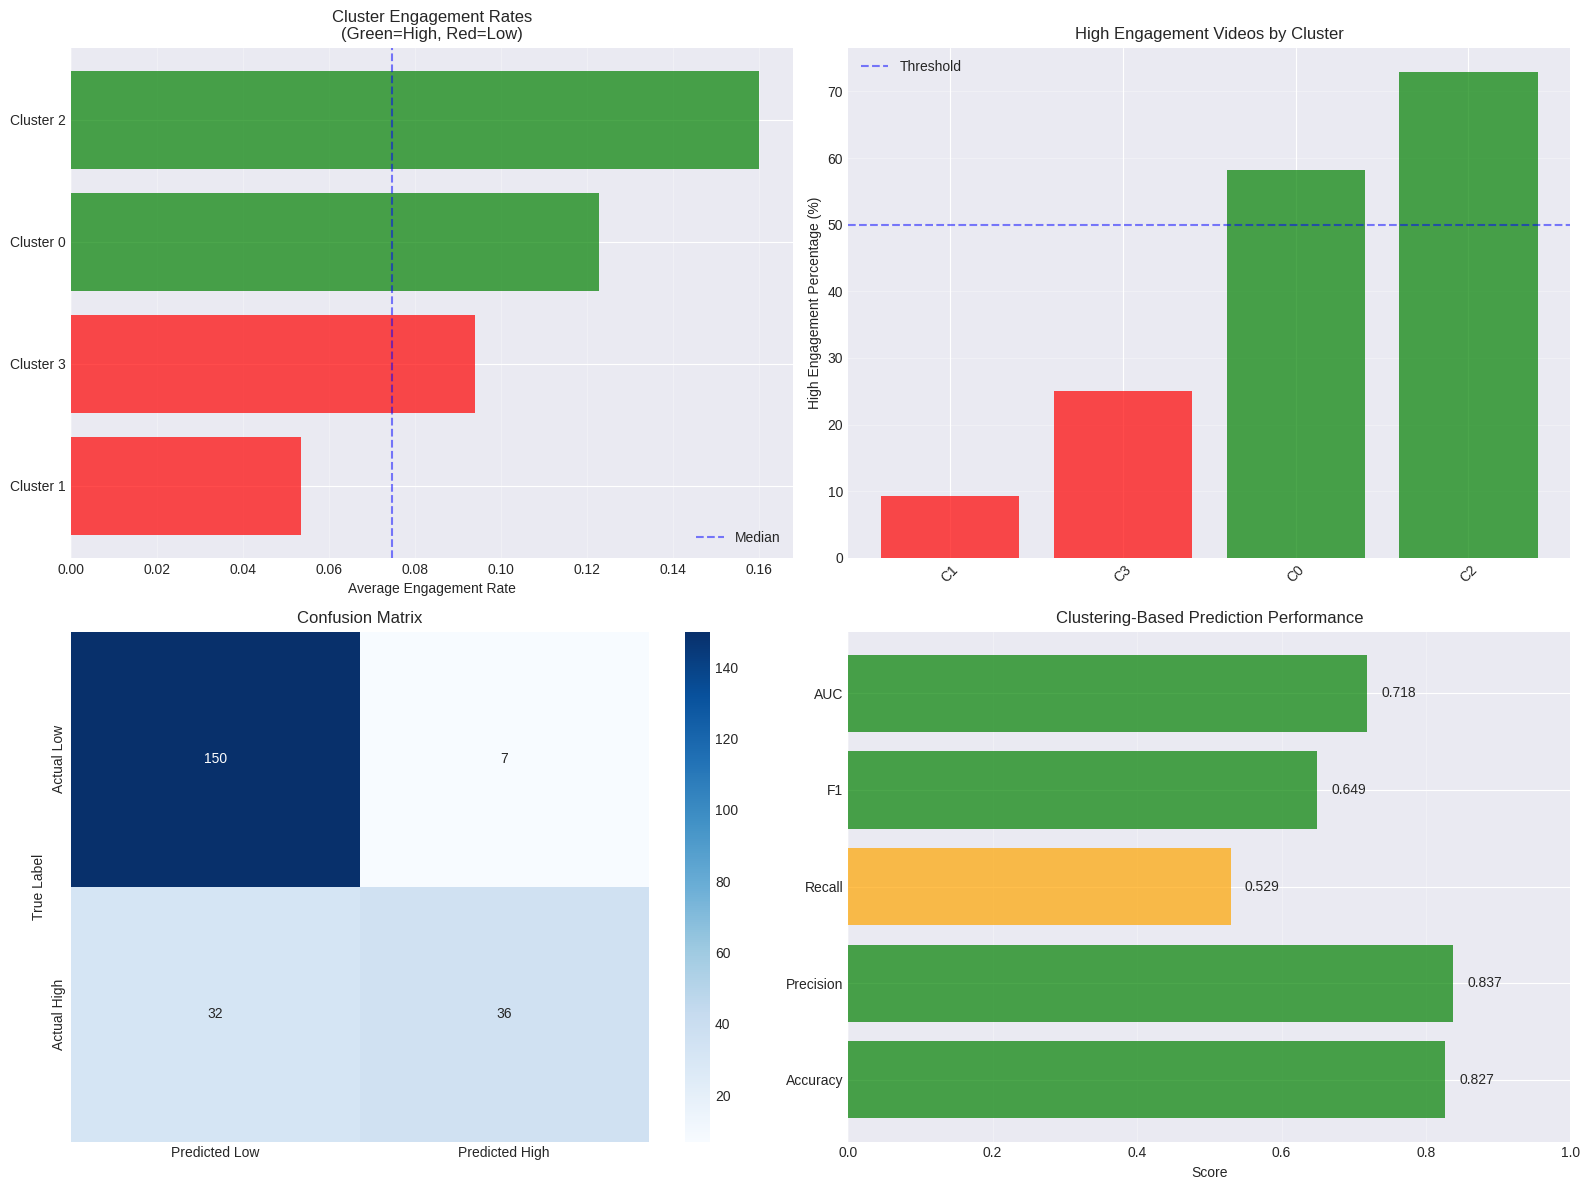


Visualizations generated successfully!


In [53]:
# Create visualizations for clustering-based predictions
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cluster Engagement Rates
cluster_engagement_sorted = cluster_engagement_train.sort_values('avg_engagement_rate', ascending=True)
colors = ['green' if idx in high_engagement_clusters else 'red' for idx in cluster_engagement_sorted.index]

axes[0, 0].barh(range(len(cluster_engagement_sorted)), cluster_engagement_sorted['avg_engagement_rate'],
                color=colors, alpha=0.7)
axes[0, 0].set_yticks(range(len(cluster_engagement_sorted)))
axes[0, 0].set_yticklabels([f'Cluster {i}' for i in cluster_engagement_sorted.index])
axes[0, 0].set_xlabel('Average Engagement Rate')
axes[0, 0].set_title('Cluster Engagement Rates\n(Green=High, Red=Low)')
axes[0, 0].grid(True, alpha=0.3, axis='x')
axes[0, 0].axvline(x=median_engagement, color='blue', linestyle='--', alpha=0.5, label='Median')
axes[0, 0].legend()

# 2. High Engagement Percentage by Cluster
axes[0, 1].bar(range(len(cluster_engagement_sorted)),
                cluster_engagement_sorted['high_engagement_rate'] * 100,
                color=colors, alpha=0.7)
axes[0, 1].set_xticks(range(len(cluster_engagement_sorted)))
axes[0, 1].set_xticklabels([f'C{i}' for i in cluster_engagement_sorted.index], rotation=45)
axes[0, 1].set_ylabel('High Engagement Percentage (%)')
axes[0, 1].set_title('High Engagement Videos by Cluster')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].axhline(y=high_engagement_cluster_threshold * 100, color='blue',
                   linestyle='--', alpha=0.5, label='Threshold')
axes[0, 1].legend()

# 3. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
axes[1, 0].set_title('Confusion Matrix')
axes[1, 0].set_ylabel('True Label')

# 4. Model Performance Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
scores = [clustering_scores[m] for m in metrics]
colors_metrics = ['green' if s >= 0.6 else 'orange' if s >= 0.4 else 'red' for s in scores]

axes[1, 1].barh(metrics, scores, color=colors_metrics, alpha=0.7)
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_title('Clustering-Based Prediction Performance')
axes[1, 1].set_xlim(0, 1)
axes[1, 1].grid(True, alpha=0.3, axis='x')
for i, (metric, score) in enumerate(zip(metrics, scores)):
    axes[1, 1].text(score + 0.02, i, f'{score:.3f}', va='center')

plt.tight_layout()
plt.show()

print("\nVisualizations generated successfully!")


### 13.6 Actionable Recommendations Based on Clustering


In [54]:
# Generate actionable recommendations based on cluster analysis
print("=" * 70)
print("ACTIONABLE RECOMMENDATIONS FOR HIGH ENGAGEMENT")
print("=" * 70)

print("\nBased on the clustering analysis, here are the key insights for creating high-engagement TikTok content:\n")

# Top 3 high-engagement clusters
top_clusters = cluster_engagement_train.nlargest(3, 'avg_engagement_rate')

print("📌 TOP 3 HIGH-ENGAGEMENT CLUSTERS:")
print("-" * 70)

for idx, (cluster_id, row) in enumerate(top_clusters.iterrows(), 1):
    cluster_data = train_df[train_df['cluster'] == cluster_id]

    print(f"\n{idx}. Cluster {cluster_id}:")
    print(f"   Engagement Rate: {row['avg_engagement_rate']:.6f}")
    print(f"   High Engagement: {row['high_engagement_rate']*100:.1f}%")
    print(f"   Videos in Cluster: {len(cluster_data)}")

    # Key characteristics
    insights = []

    if 'duration' in cluster_data.columns:
        avg_duration = cluster_data['duration'].mean()
        insights.append(f"Average Duration: {avg_duration:.1f} seconds")

    if 'has_text' in cluster_data.columns:
        text_pct = cluster_data['has_text'].mean() * 100
        insights.append(f"Text Content: {text_pct:.1f}% have text")

    if 'musicMeta.musicOriginal' in cluster_data.columns:
        original_pct = cluster_data['musicMeta.musicOriginal'].mean() * 100
        insights.append(f"Original Music: {original_pct:.1f}%")

    if insights:
        print(f"   Key Characteristics: {', '.join(insights)}")

print("\n" + "=" * 70)
print("PREDICTION SYSTEM SUMMARY")
print("=" * 70)
print(f"\n✅ Best Clustering Algorithm: {best_model_name}")
print(f"✅ Number of Clusters: {len(set(best_clustering_labels))}")
print(f"✅ High-Engagement Clusters Identified: {len(high_engagement_clusters)}")
print(f"✅ Prediction Performance:")
print(f"   - Accuracy: {clustering_scores['Accuracy']:.4f}")
print(f"   - F1 Score: {clustering_scores['F1']:.4f}")
print(f"   - AUC-ROC: {clustering_scores['AUC']:.4f}")

print("\n" + "=" * 70)
print("HOW TO USE THIS PREDICTION SYSTEM")
print("=" * 70)
print("""
1. For a new video, extract the same features used in clustering
2. Apply PCA transformation (if used) to match the clustering space
3. Assign the video to a cluster using the clustering model
4. If the video is assigned to a high-engagement cluster, predict high engagement
5. Use cluster characteristics to guide content creation

Key Advantage: This approach identifies natural groupings in your data and uses
cluster membership as a predictor, which can be more robust than supervised
learning when you have limited labeled data or want to discover hidden patterns.
""")


ACTIONABLE RECOMMENDATIONS FOR HIGH ENGAGEMENT

Based on the clustering analysis, here are the key insights for creating high-engagement TikTok content:

📌 TOP 3 HIGH-ENGAGEMENT CLUSTERS:
----------------------------------------------------------------------

1. Cluster 2:
   Engagement Rate: 0.159900
   High Engagement: 72.9%
   Videos in Cluster: 48
   Key Characteristics: Text Content: 100.0% have text, Original Music: 81.2%

2. Cluster 0:
   Engagement Rate: 0.122700
   High Engagement: 58.2%
   Videos in Cluster: 316
   Key Characteristics: Text Content: 97.2% have text, Original Music: 78.8%

3. Cluster 3:
   Engagement Rate: 0.094000
   High Engagement: 25.0%
   Videos in Cluster: 4
   Key Characteristics: Text Content: 75.0% have text, Original Music: 75.0%

PREDICTION SYSTEM SUMMARY

✅ Best Clustering Algorithm: GMM
✅ Number of Clusters: 4
✅ High-Engagement Clusters Identified: 2
✅ Prediction Performance:
   - Accuracy: 0.8267
   - F1 Score: 0.6486
   - AUC-ROC: 0.7182

HOW TO